In [21]:
from pyts.datasets import load_gunpoint
from pyts.image import GramianAngularField
#from pyts.image import GASF, GADF
from scipy.signal import find_peaks
from scipy.misc import electrocardiogram
from scipy.spatial.distance import pdist, squareform
from pyts.image import MarkovTransitionField
import pylab as plt
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.preprocessing import MinMaxScaler

            ims
0      -4269191
1      -4268125
2      -4264135
3      -4262821
4      -4261111
...         ...
162575 -4220507
162576 -4220835
162577 -4210799
162578 -4214895
162579 -4210402

[162580 rows x 1 columns]


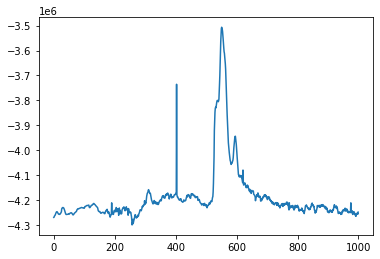

In [22]:
data_frame = pd.read_csv('sci/농도별데이터_2022/TNT/10ng/TNT_10.csv')
#data_frame = pd.read_csv('sci/농도별데이터_2022/Normal/Normal_10.csv')
print(data_frame)
graph_data_or = data_frame['ims']
graph_data_sum=0
graph_data_sum_last=[]
cnt_first_graph=1
graph_first_preview = []

graph_first_preview = data_frame[0:1000]
plt.plot(graph_first_preview)
'''
for i in range(math.ceil(len(graph_data_or))):
    graph_data_sum = graph_data_sum + sum(graph_data_or[i:i+50])#값 모두다 합침
    graph_data_sum_last = np.append(graph_data_sum_last, int(math.ceil(graph_data_sum/50)))
    # 50번째마다 데이터 들의 합의 평균을 저장
    #print(len(graph_data_sum_last))
    graph_data_sum = 0
    cnt_first_graph = cnt_first_graph + 1
'''
for i in range(math.ceil(len(graph_data_or))):
    graph_data_sum = graph_data_sum + graph_data_or[i]
    if cnt_first_graph%20==0:
        graph_data_sum_last = np.append(graph_data_sum_last, graph_data_sum)
        graph_data_sum = 0
    cnt_first_graph = cnt_first_graph + 1


8129


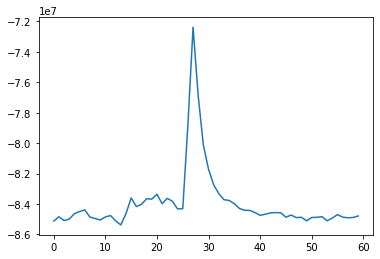

In [23]:
df_1 = pd.DataFrame(graph_data_sum_last)
#df_1.to_csv('peak_con/rdx/200n/RDX_200ng.csv', encoding='utf-8', index=False)
df_1.to_csv('sci/tnt_10_10ng.csv', encoding='utf-8', index=False)
#df_1.to_csv('sci/Normal_10.csv', encoding='utf-8', index=False)
print(len(graph_data_sum_last))
graph_data_sum_last_review = graph_data_sum_last[0:60]
plt.plot(graph_data_sum_last_review)
plt.show()

In [4]:
'''
#데이터 전처리 잘되었나 확인용 코드
df_2 = pd.read_csv("peak_con/tnt/200n/TNT_200ng.csv")
gp_df_1 = []
gp_df_1 = df_2[['0']]
for i in range(math.ceil(len(gp_df_1)/4455)-1):
    graph_show = []
    graph_show = gp_df_1[i*4455:(i+1)*4455]
    graph_show.plot()
'''

'\n#데이터 전처리 잘되었나 확인용 코드\ndf_2 = pd.read_csv("peak_con/tnt/200n/TNT_200ng.csv")\ngp_df_1 = []\ngp_df_1 = df_2[[\'0\']]\nfor i in range(math.ceil(len(gp_df_1)/4455)-1):\n    graph_show = []\n    graph_show = gp_df_1[i*4455:(i+1)*4455]\n    graph_show.plot()\n'

[-83853670. -72700818. -84028453. -84763704. -84575744. -85021929.
 -84869700. -84865607. -85025392. -84803852.]
[-83818145. -83716064. -72018672. -83948970. -84246965. -84441549.
 -84735085. -84710132. -84700242.]
[-84651702. -84787866. -83670786. -83717186. -83742650. -72967347.
 -83647486. -84619747. -84752988. -84981255.]
[-84827048. -85022051. -84749010. -83740896. -83440777. -72284866.
 -83869222. -84475224.]
[-84811411. -84613039. -84883905. -84773574. -84717124. -83914426.
 -83769342. -83817138. -74663001.]
[-84533989. -84815099. -84809622. -84881541. -84763607. -84772820.
 -84850713. -84744294. -83316665. -83776562. -71813768.]
[-83844700. -83821644. -84588837. -84998464. -84932750. -84868106.
 -84961491. -84823684. -84780188. -83840284. -83285216.]
[-73798054. -83404616. -84148204. -84856037. -84654429. -84690630.
 -84996084. -84806659. -84743697.]
[-83513665. -83819114. -73158356. -83974982. -83719790. -84715544.
 -84831618. -84752778. -84862191. -84994350.]
[-84791294. -839

[-84874850. -84789008. -85028946. -84808935. -83949806. -83986948.
 -83633762. -74322867. -80347659. -84799460.]
[-84964596. -84999889. -84828692. -84894442. -85142901. -84855219.
 -84017852. -83727751. -84010972. -73925595.]
[-84654917. -84976979. -84878072. -84765626. -84696523. -84947233.
 -84587309. -83696147. -83749748. -73505921.]
[-82357598. -84742735. -84914356. -84971699. -84859585. -84980452.
 -85004518. -84795643. -83876896. -84030395.]
[-74969127. -80379018. -84601558. -84620572. -84736017. -84811852.
 -84704080. -84767250. -85014281. -84702382.]
[-83762091. -72938558. -81535907. -84729017. -84913100. -84981394.
 -84827498. -84881696.]
[-84560304. -83696320. -83532785. -71700143. -80937894. -84450307.
 -84619425. -84912709. -84831001.]
[-84959912. -84867063. -84740679. -83581162. -83895346. -84005631.
 -73378940. -81367930. -84629991.]
[-84827741. -84664020. -84982378. -84711767. -84725110. -83506871.
 -83662237. -84031097. -71948531.]
[-83364720. -80444475. -84552326. -847

[-83635977. -83831651. -75187501. -82755953. -84624136. -84759968.
 -84760668. -84607914.]
[-84680906. -84627958. -83565929. -83601200. -83380955. -75807500.
 -83261902. -83072716. -84190790. -84573162. -84622882.]
[-84649266. -84808197. -84869808. -83668723. -83915295. -73349599.
 -83518006.]
[-84597460. -84751791. -84415640. -84710472. -84675186. -84410613.
 -83719918. -83638743. -83304720. -73055338. -83379970.]
[-84500695. -84652668. -84856667. -84750744. -84794469. -84837260.
 -84848255. -83684389. -83638874. -74020551.]
[-83590868. -84230393. -84468124. -84745748. -84438915. -84433034.
 -84744532. -84381166. -83996343. -83614294.]
[-75603219. -83338790. -84440950. -84630269. -84648583. -84743384.
 -84658511. -84746387. -84792859. -84711530.]
[-83807449. -73558077. -83545093. -83352705. -84524374. -84495524.
 -84852091. -84575870. -84741781. -84892526.]
[-84657522. -83805582. -83632647. -73860999. -83834307. -84596809.
 -84599258. -84625186.]
[-84665878. -84545754. -84535113. -836

[-84704812. -84692373. -84541774. -83604705. -83561988. -73744285.
 -84015712. -84119326. -84378133.]
[-84520684. -84401802. -84625772. -84355032. -84446452. -83641970.
 -83516837. -83653504. -76264806. -84039914.]
[-84339228. -84573862. -84582816. -84559579. -84800174. -84437212.
 -84560779. -83366856. -83556201. -74307413.]
[-83907665. -83904563. -84310234. -84538970. -84244545. -84628347.
 -84681770. -84771425. -84666270. -83652242. -83489923. -83756683.]
[-74317550. -83692629. -84163318. -84599893. -84261398. -84554193.
 -84693718. -84420598. -84355533.]
[-83432947. -83805466. -74704136. -83923266. -84425466. -84528577.
 -84560282. -84646175. -84645900. -84518289.]
[-83576865. -83722731. -74393561. -83641731. -84265448. -84423912.
 -84314835. -84372901. -84575884.]
[-84530969. -84431976. -83367093. -83691670. -75768364. -83641252.
 -83992304. -84475895. -84419872.]
[-84623496. -84440390. -84714228. -84518823. -83520926. -83591405.
 -73608437. -83436956. -84151283.]
[-84304046. -847

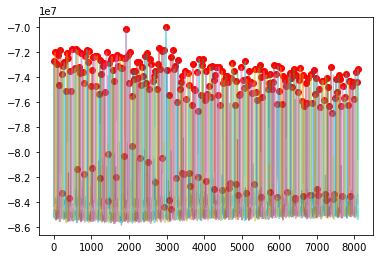

In [5]:
#df_3 = pd.read_csv("peak_con/tnt/200n/TNT_200ng.csv")
df_3 = pd.read_csv("sci/ng_10_200ng.csv")
#df_3 = pd.read_csv("sci/Normal_10.csv")
df_3 = df_3['0']

#print(math.ceil(len(df_3)/4455)-1)
#print(math.ceil(len(df_3)/15)-1)
graph_num=[]
peak_num_count=[]
sum_where_min_peak=[]
a = []
b = []
#for i in range(math.ceil(len(df_3)/60)-1):
for i in range(math.ceil(len(df_3)/30)-1):
#for i in range(5):
    #graph_num = df_3[(i*4455):((i+1)*4455)]
    #graph_num = df_3[(i*15):((i+1)*15)]
    graph_num = df_3[(i*30):((i+1)*30)]
    #print(graph_num)
    
    peaks, properties = find_peaks(graph_num, height=(None, -4000000))
    peaks_num = peaks # 피크의 위치들
    peaks_value = properties["peak_heights"] # 피크의 위치들의 값
    print(peaks_value)
    
    try:
        max_peak_value = max(peaks_value) # 피크의 값중 가장 값
        #max_peak_find = np.where(peaks_value==max_peak_value) # 탐색 된 가장 작은 피크값의 위치 값
    except ValueError:
        max_peak_value = -200000000
    max_peak_find = np.where(peaks_value==max_peak_value) # 탐색 된 가장 작은 피크값의 위치 값
    where_max_peak = peaks_num[max_peak_find] #가장 작은 피크값들 위치 모음
    
    if i > 0:
        #sum_where_min_peak = where_min_peak + sum_where_min_peak # 가장 작은 
        sum_where_max_peak = where_max_peak
        a= np.array(sum_where_max_peak)
    else:
        sum_where_max_peak = where_max_peak
        a= np.array(sum_where_max_peak)
    
    #a= np.array(where_min_peak) #peak값 위치모음 numpy배열에 저장
    #print(a)
    #b= np.array(i*4455) #peak 위치값의 정확한 위치를 파악하기 위해 더해주는 값
    b= np.array(i*30)
    #print(b)
        
    peak_num_count = np.append(peak_num_count,a+b) #작은 피크들 위치 값 배열에 저장
    #print(peak_num_count)
    graph_num.plot(alpha = 0.5)
    plt.scatter((i*30)+peaks_num[max_peak_find], max_peak_value, c = 'r') # 피크들 그래프 상에 점의 형식으로 띄우는 것
    
#print(peak_num_count)

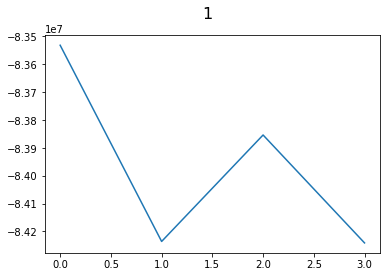

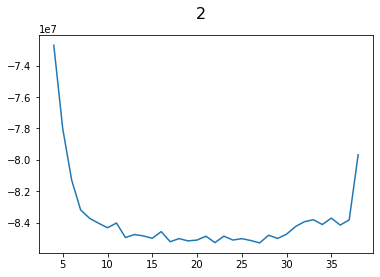

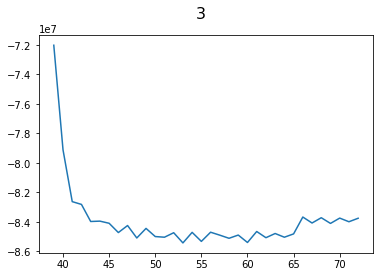

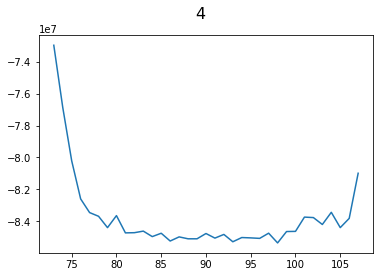

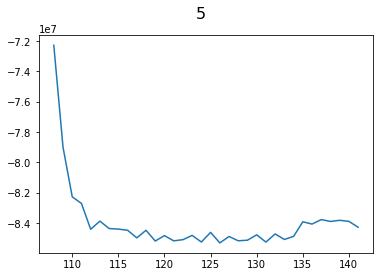

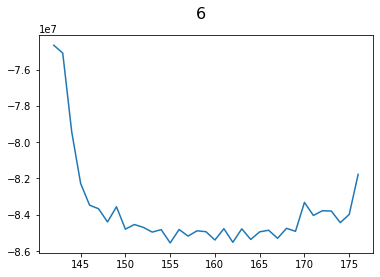

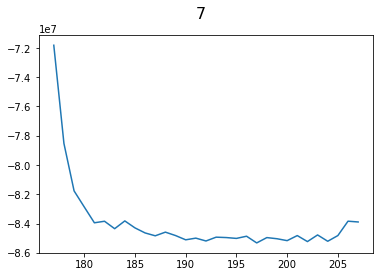

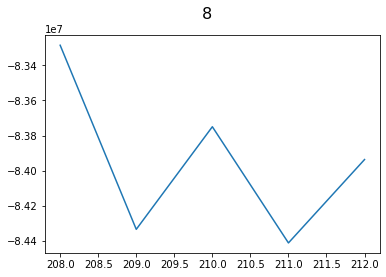

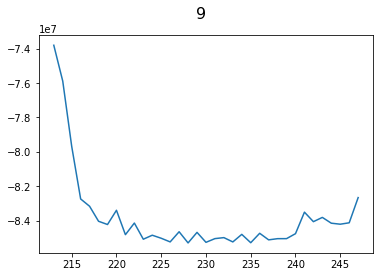

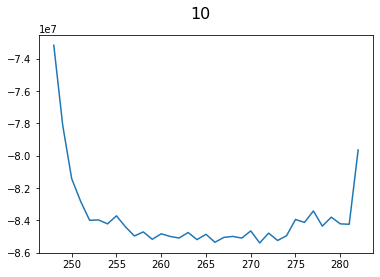

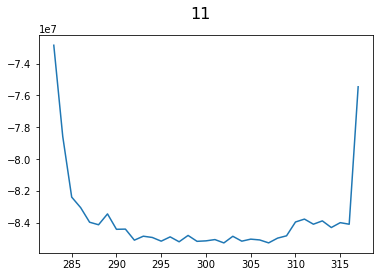

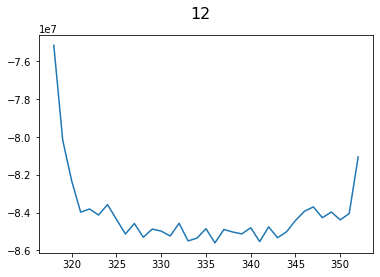

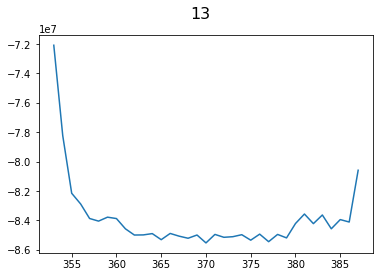

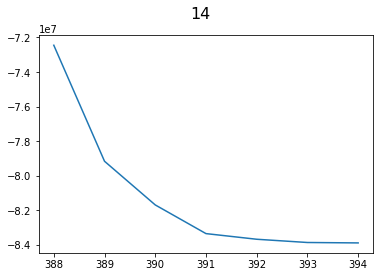

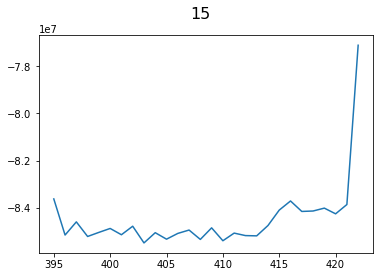

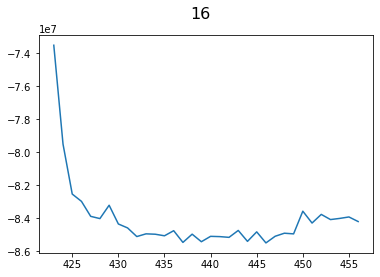

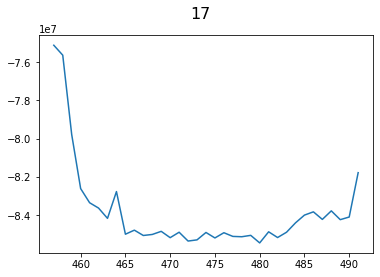

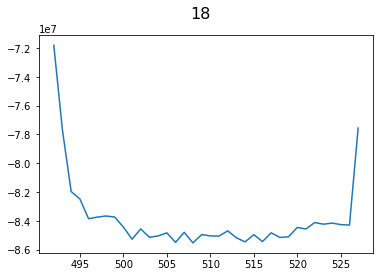

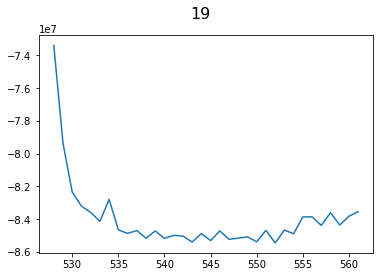

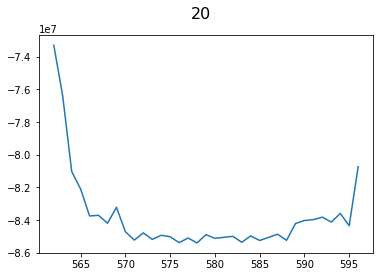

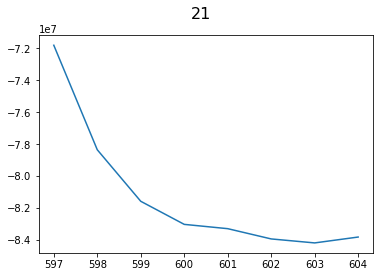

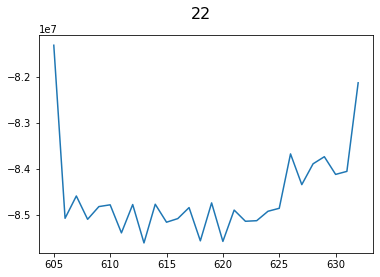

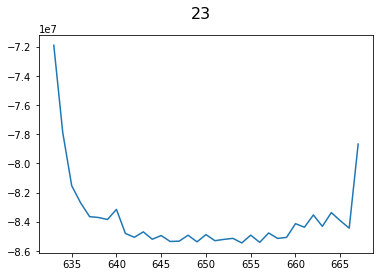

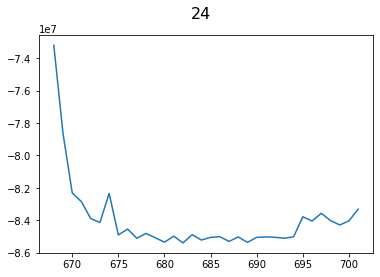

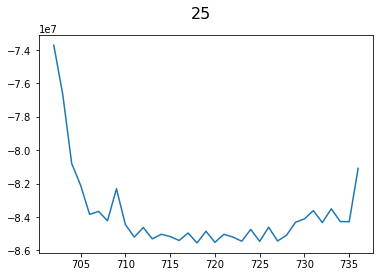

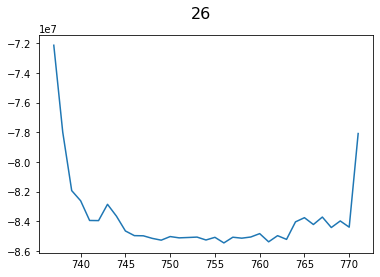

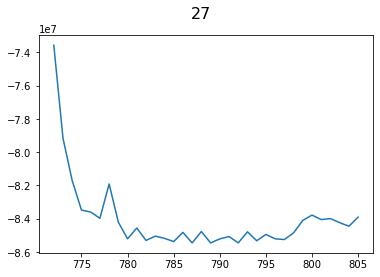

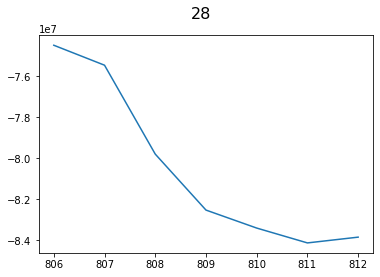

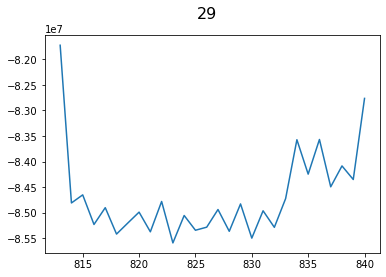

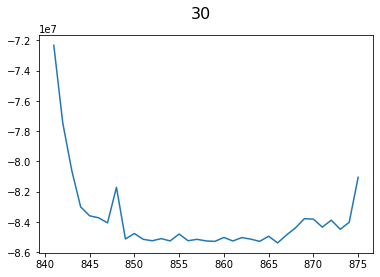

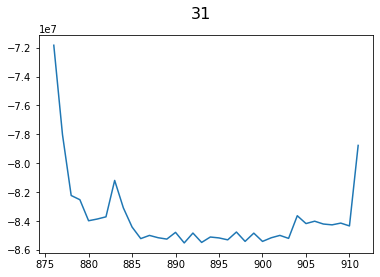

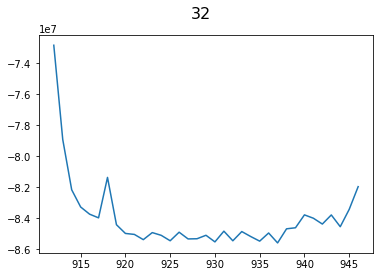

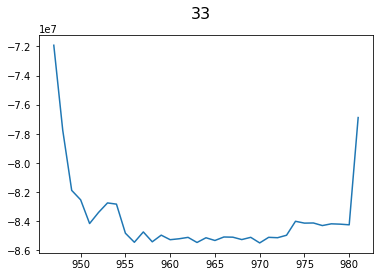

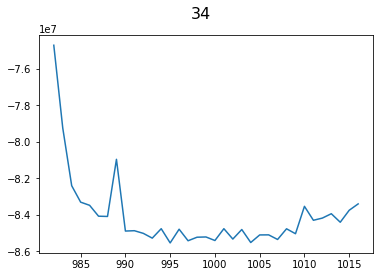

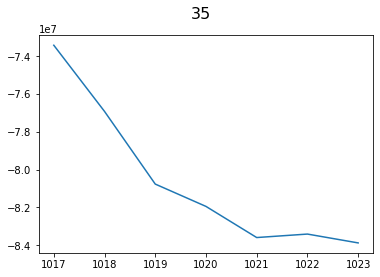

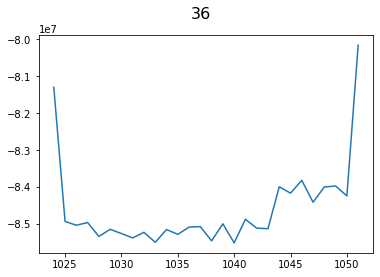

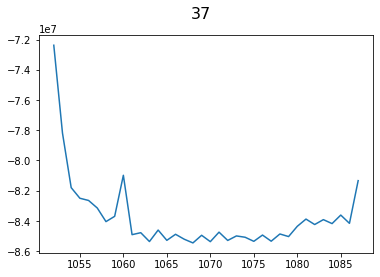

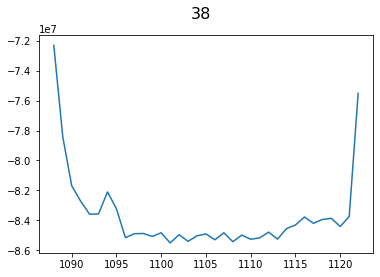

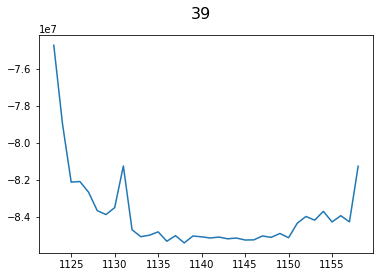

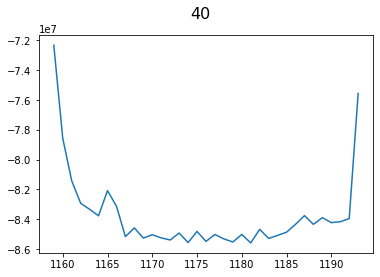

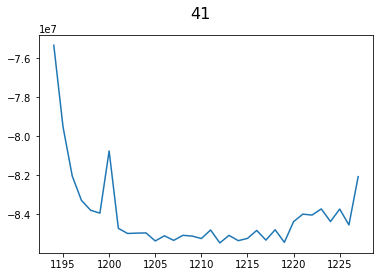

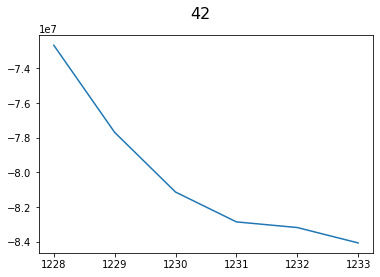

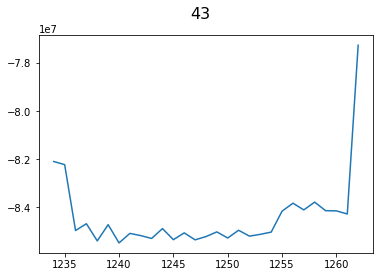

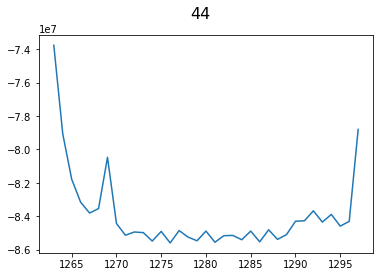

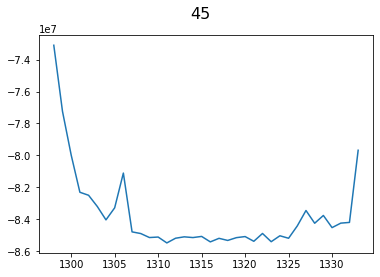

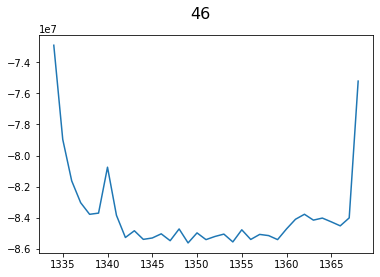

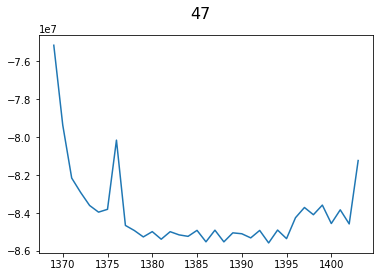

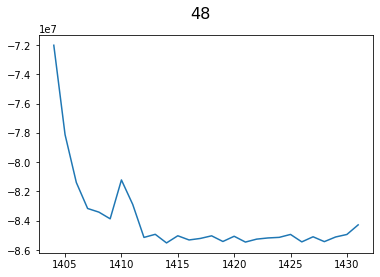

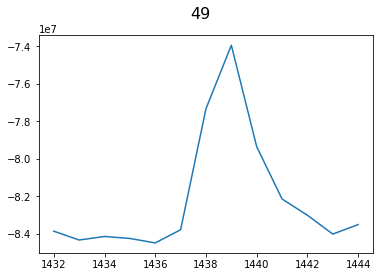

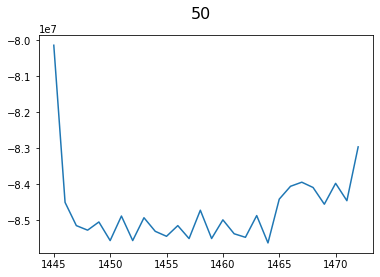

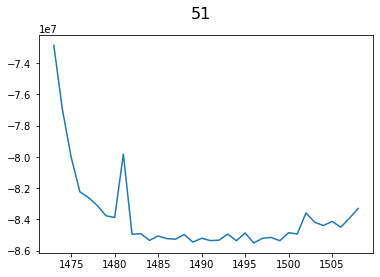

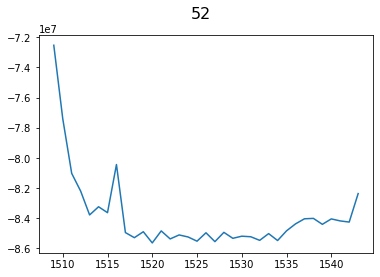

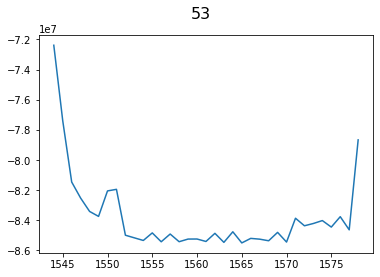

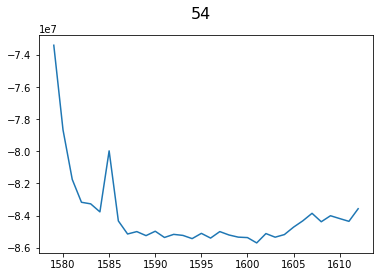

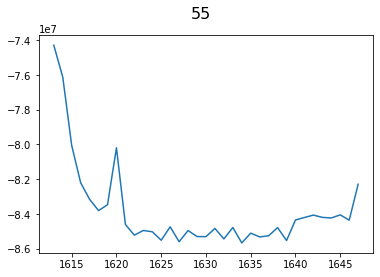

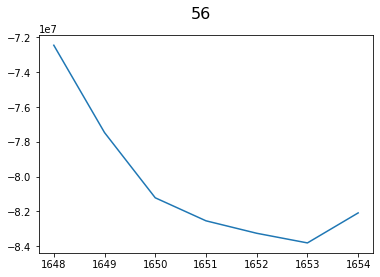

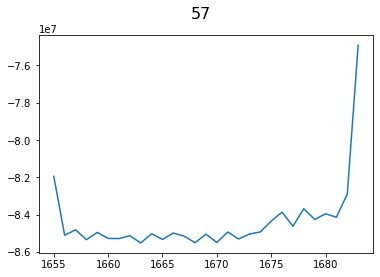

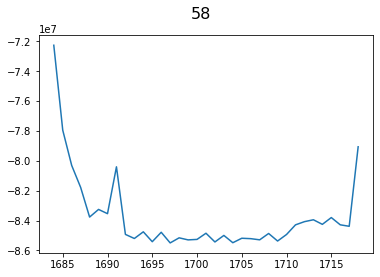

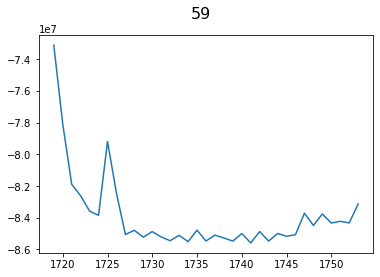

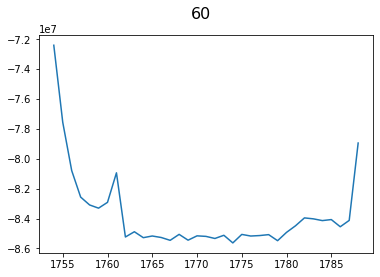

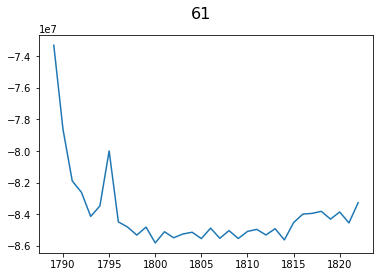

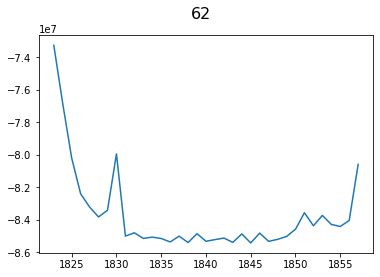

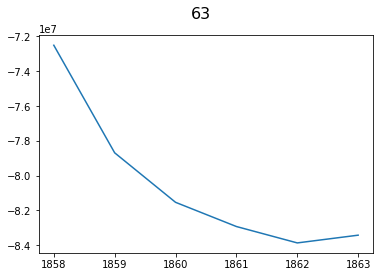

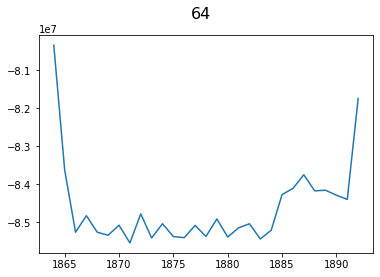

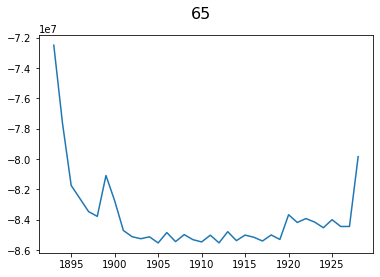

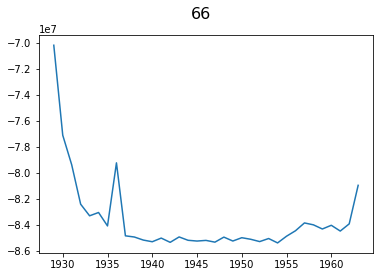

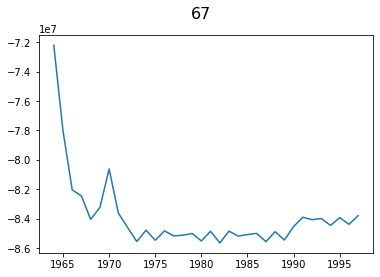

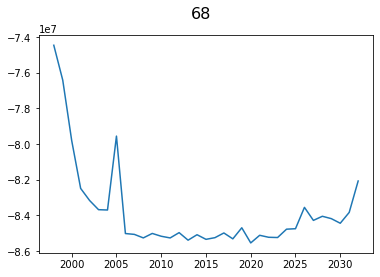

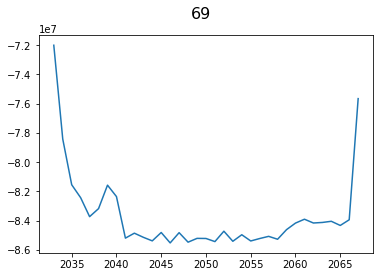

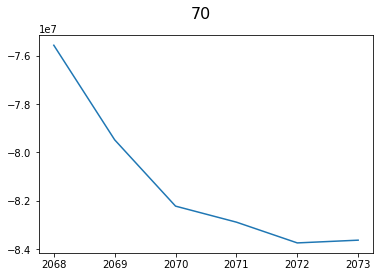

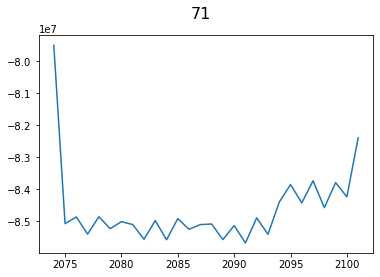

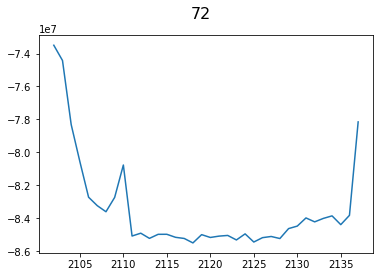

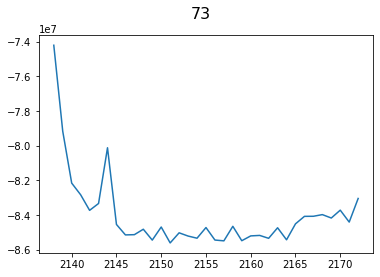

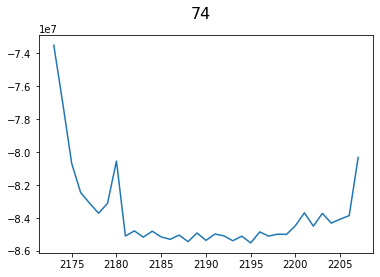

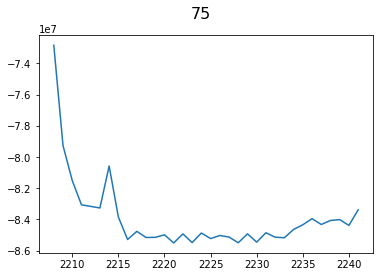

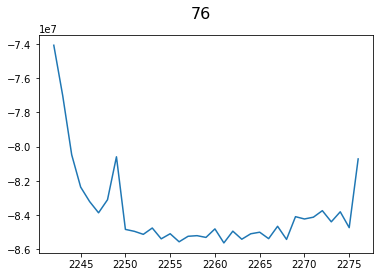

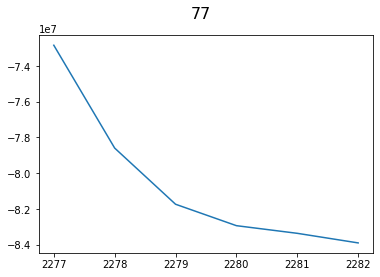

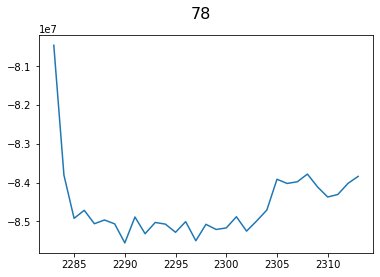

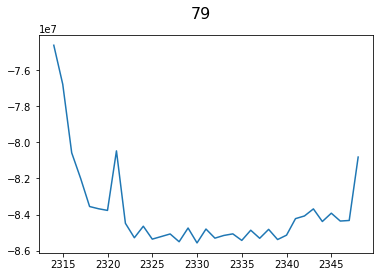

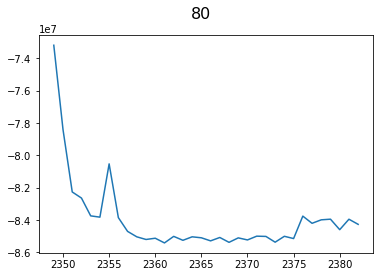

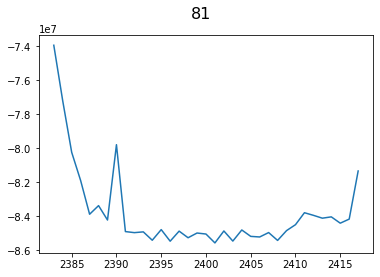

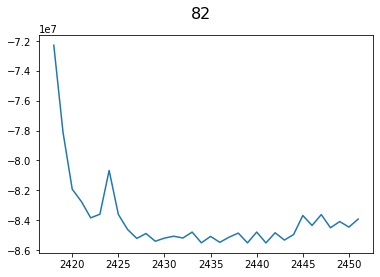

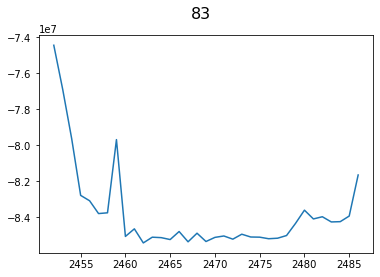

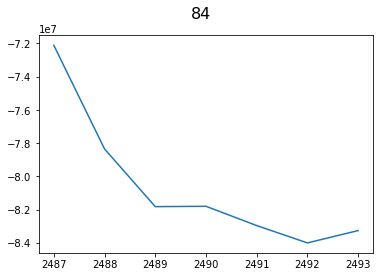

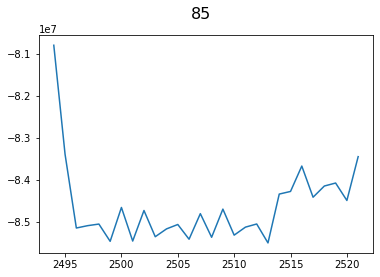

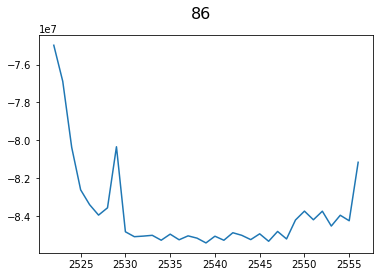

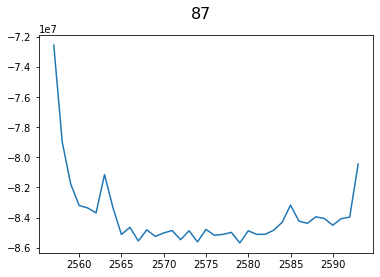

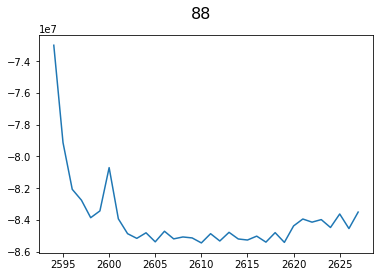

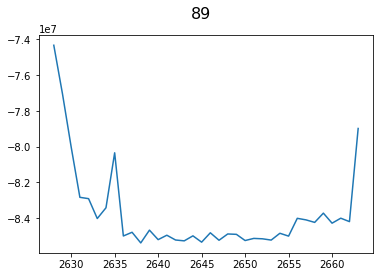

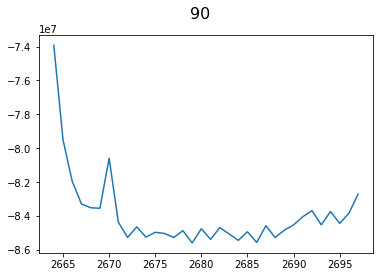

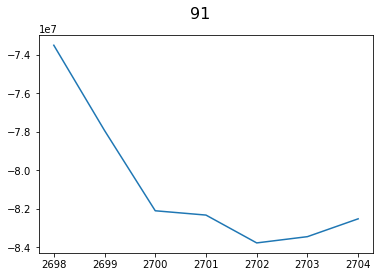

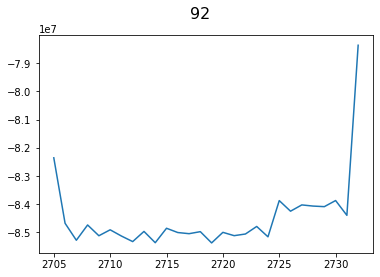

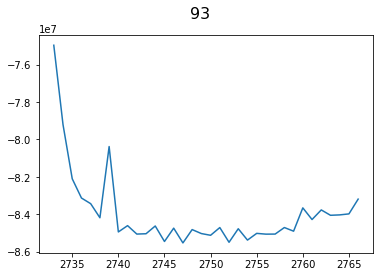

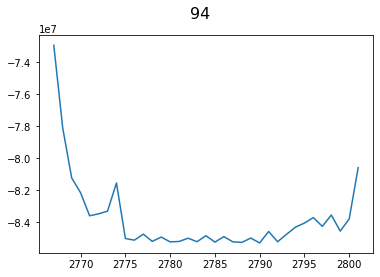

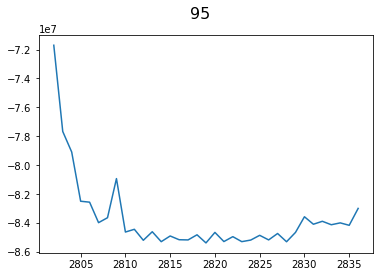

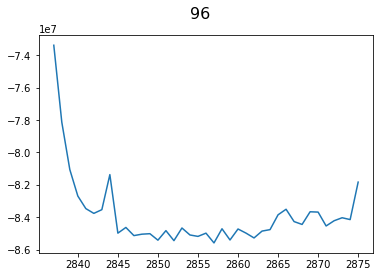

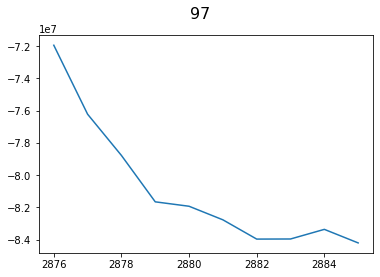

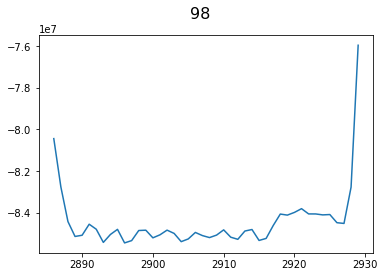

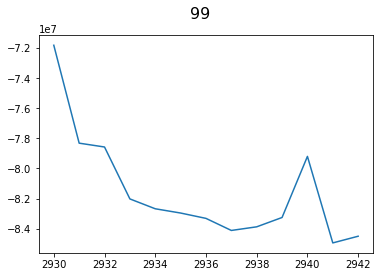

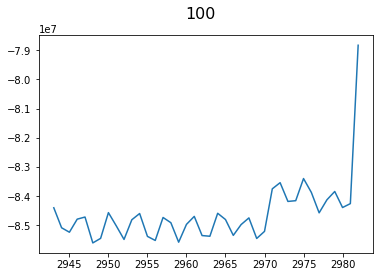

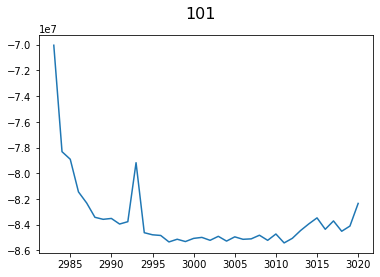

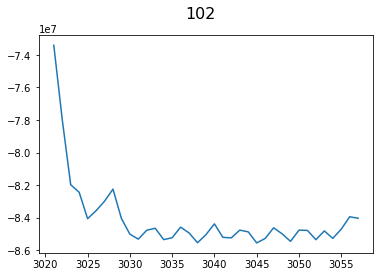

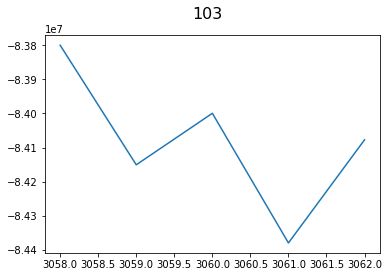

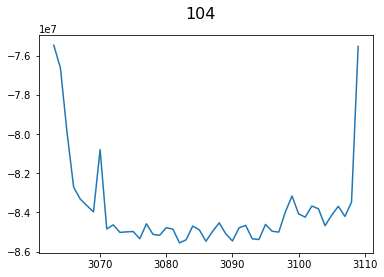

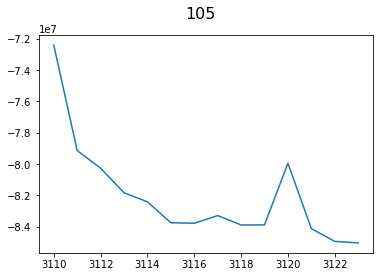

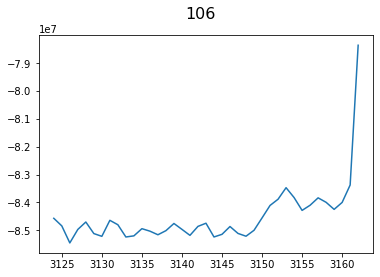

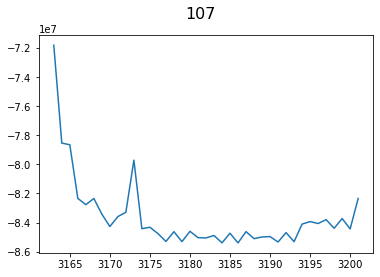

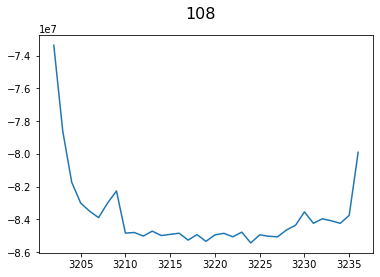

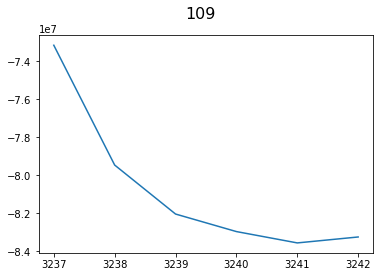

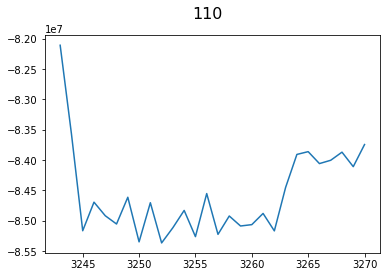

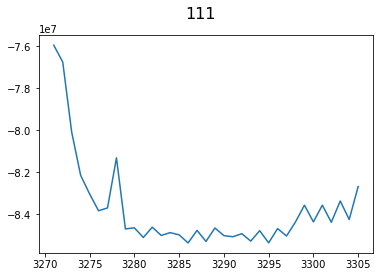

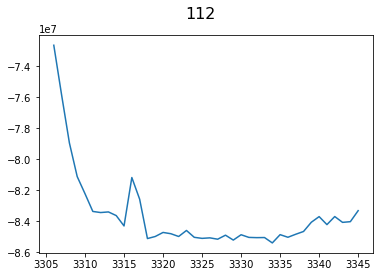

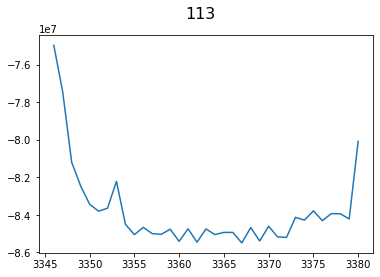

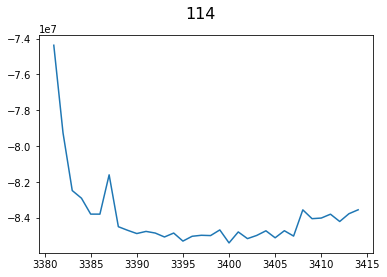

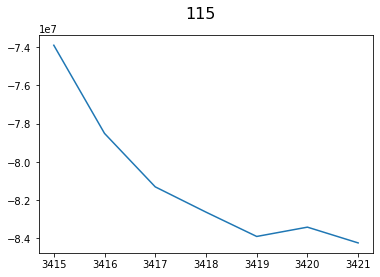

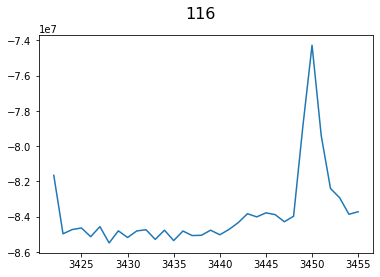

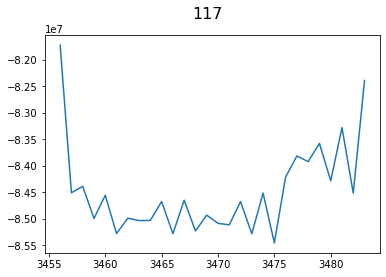

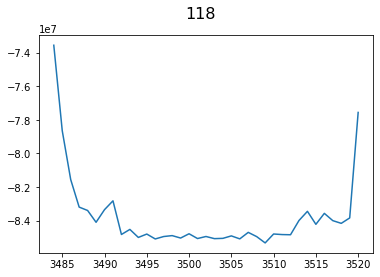

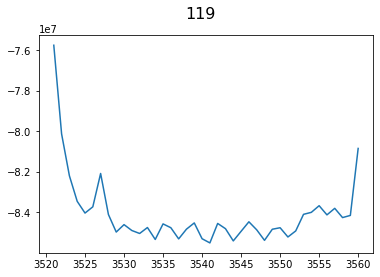

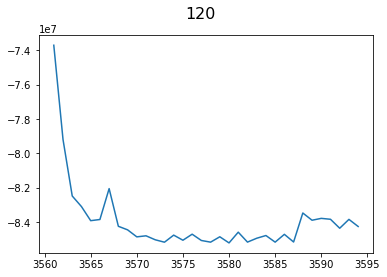

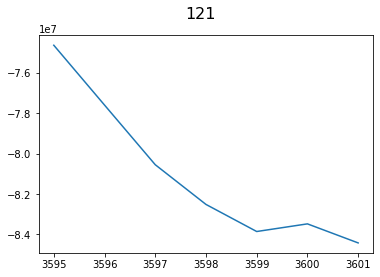

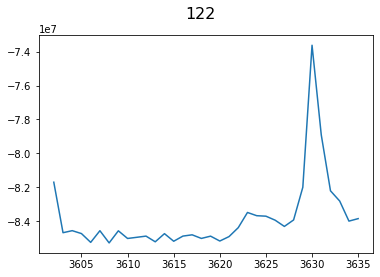

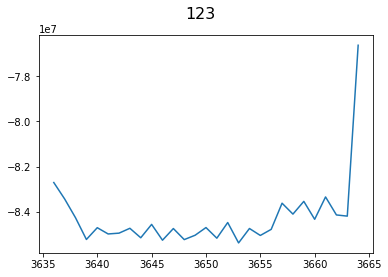

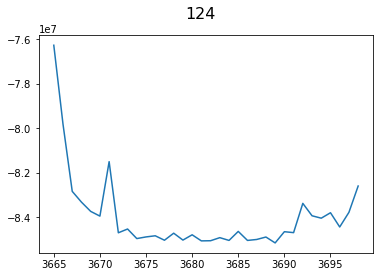

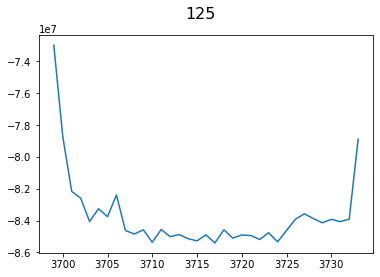

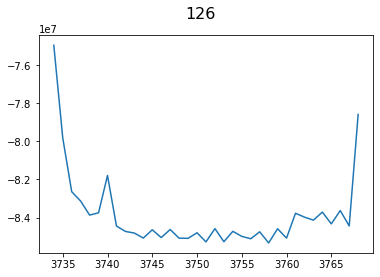

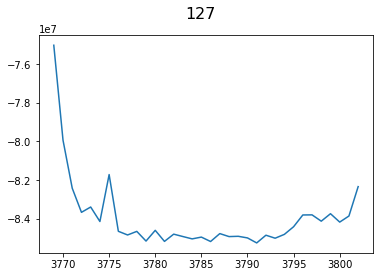

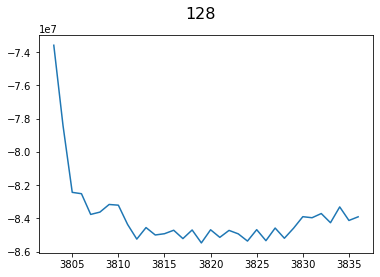

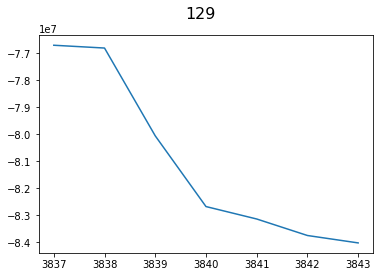

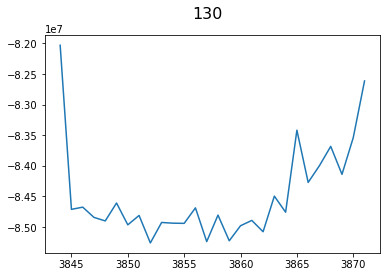

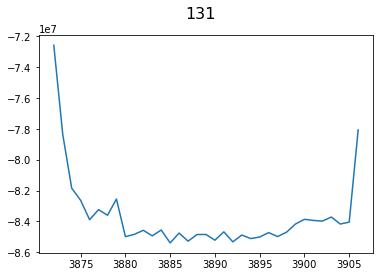

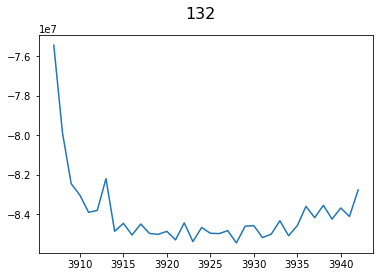

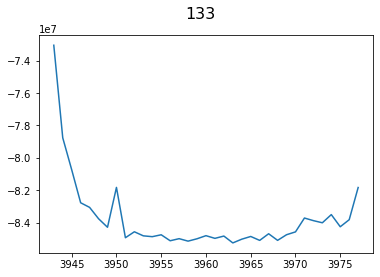

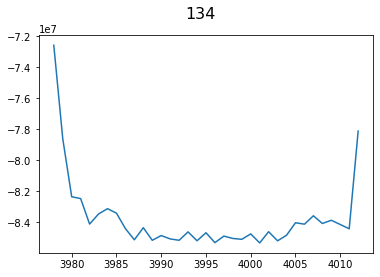

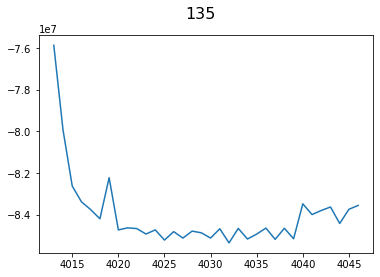

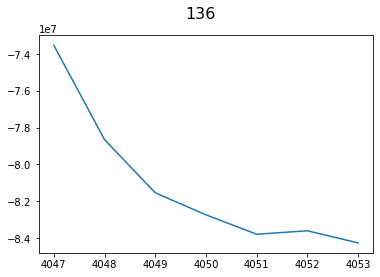

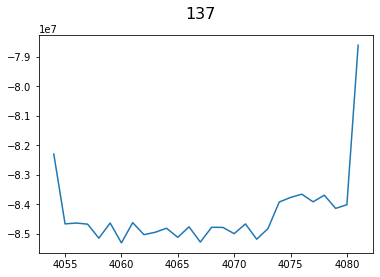

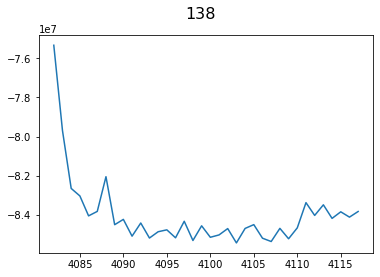

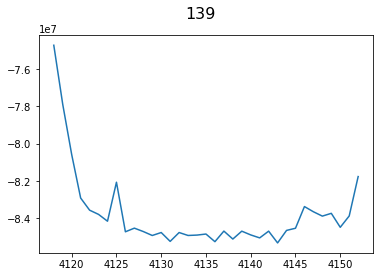

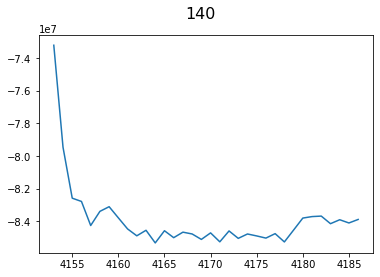

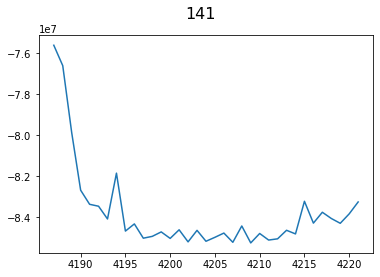

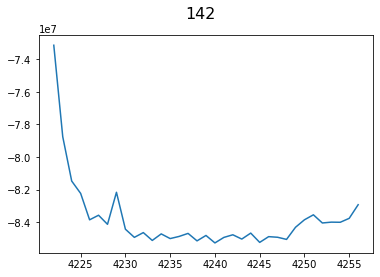

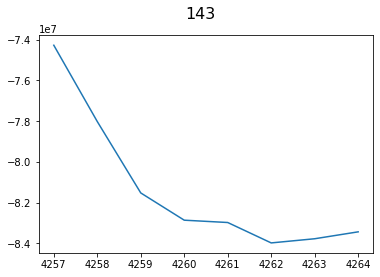

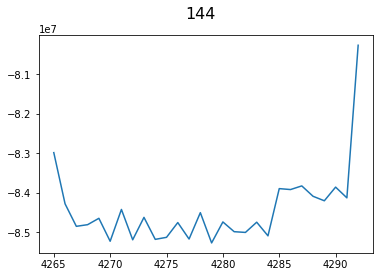

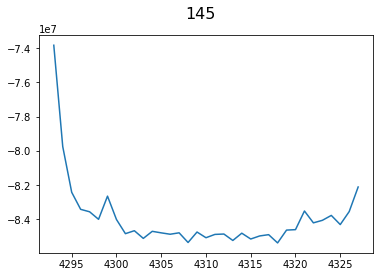

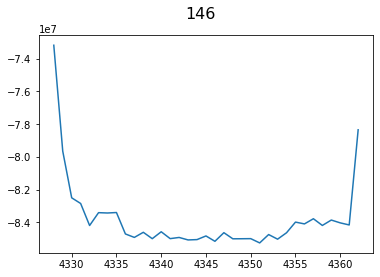

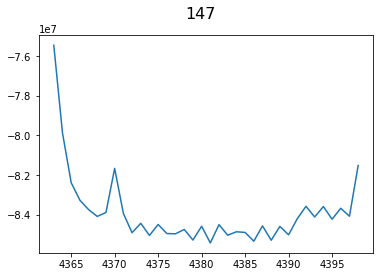

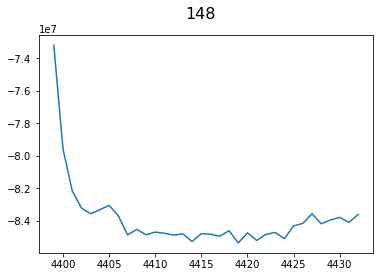

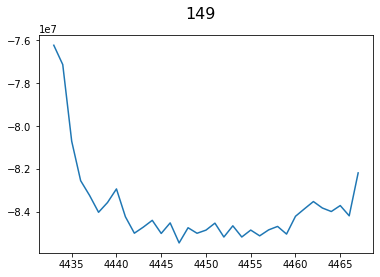

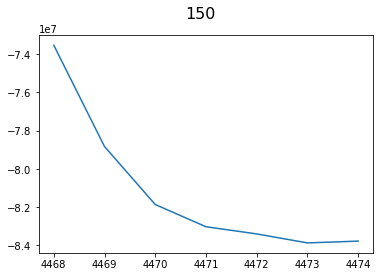

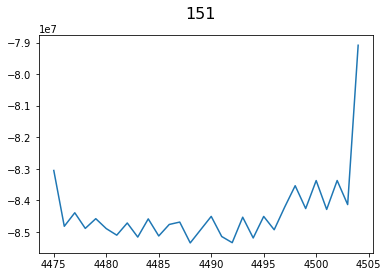

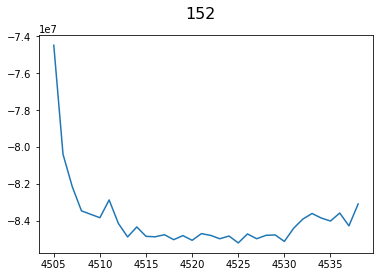

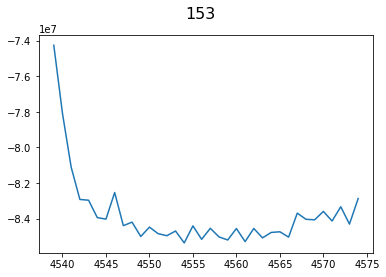

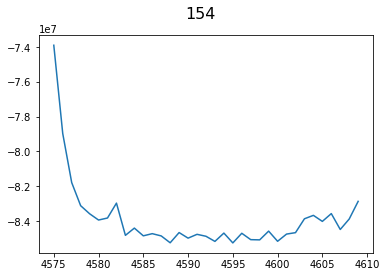

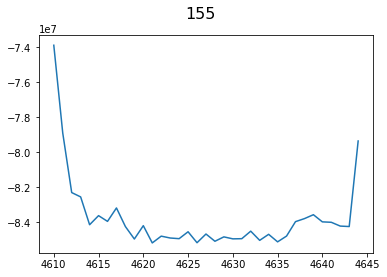

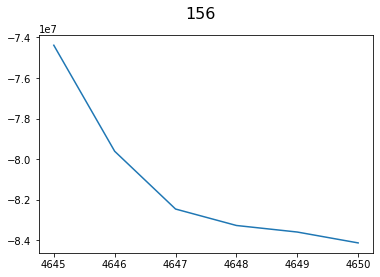

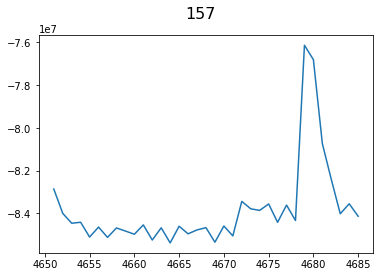

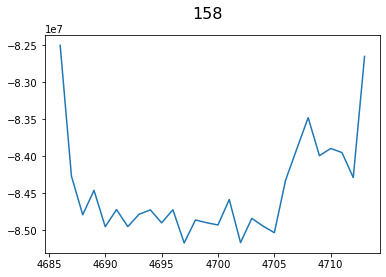

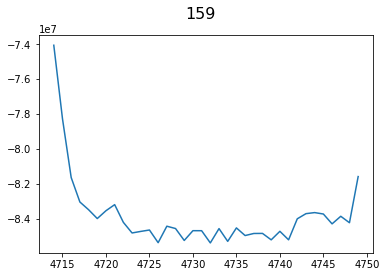

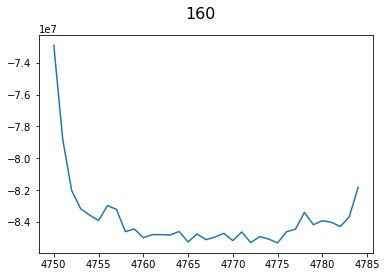

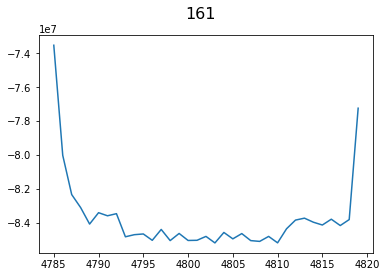

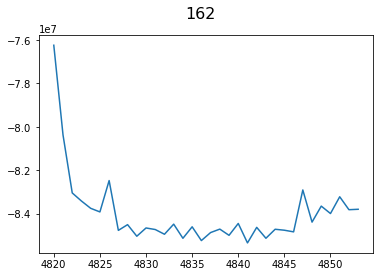

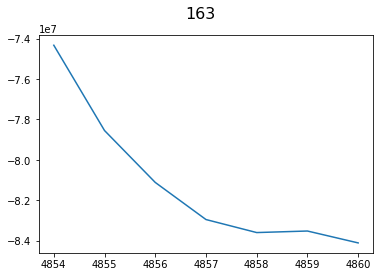

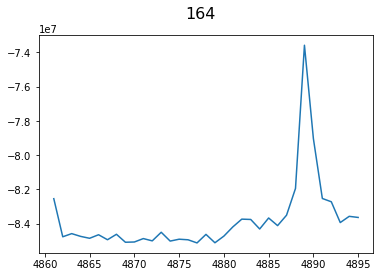

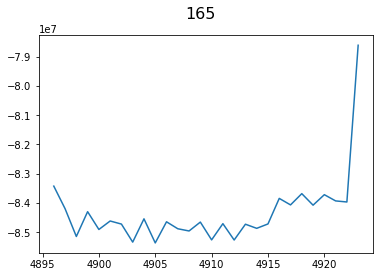

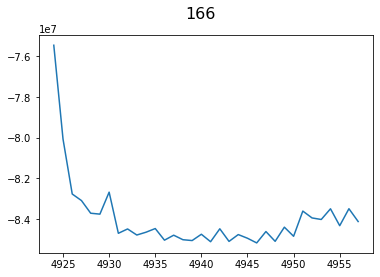

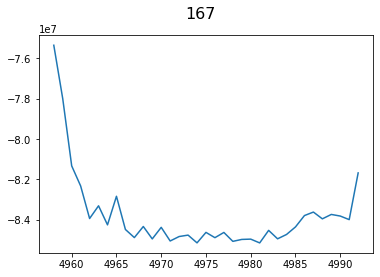

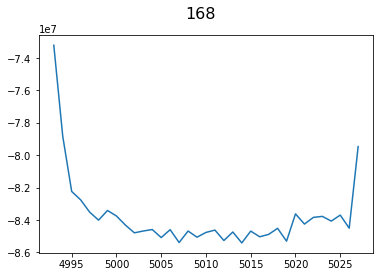

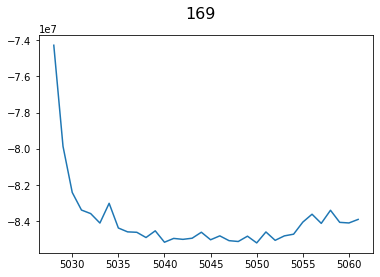

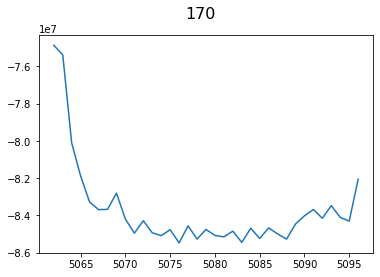

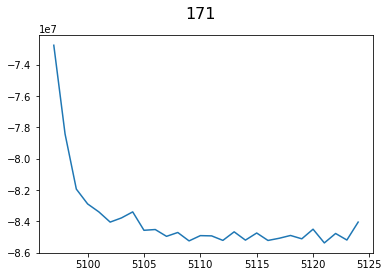

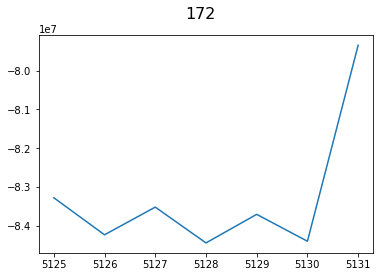

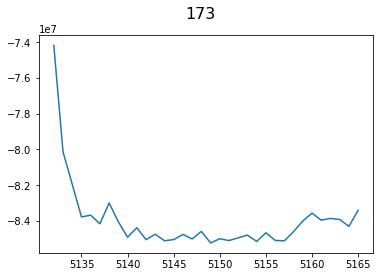

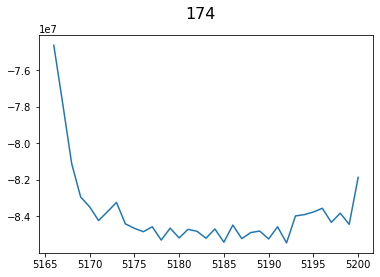

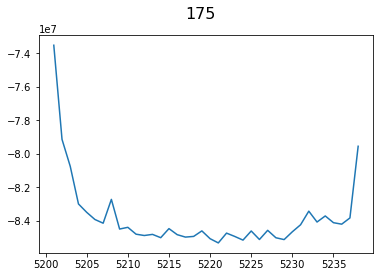

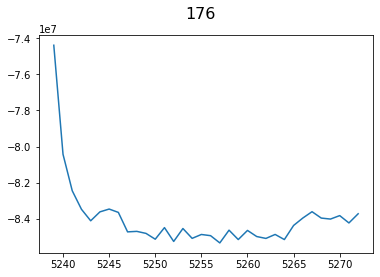

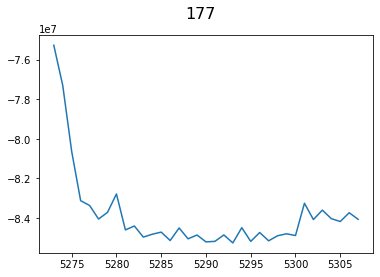

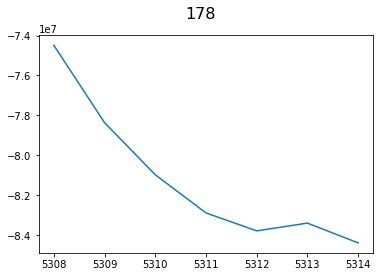

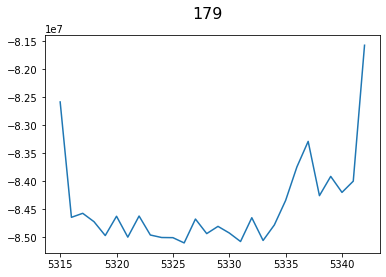

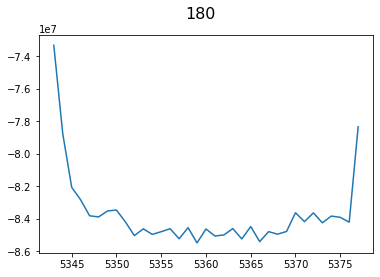

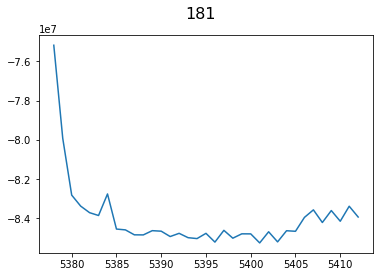

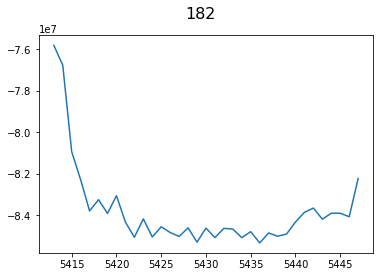

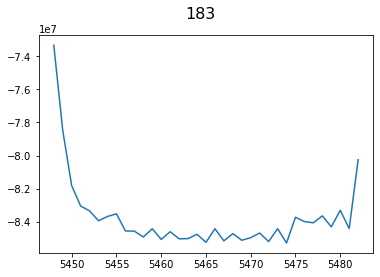

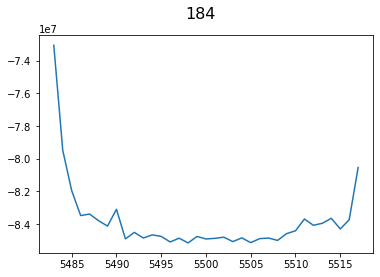

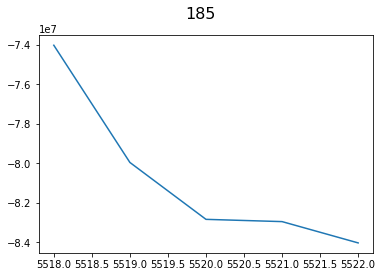

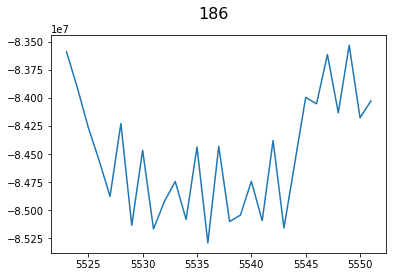

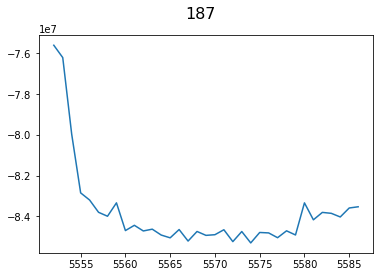

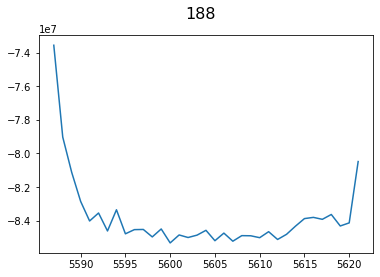

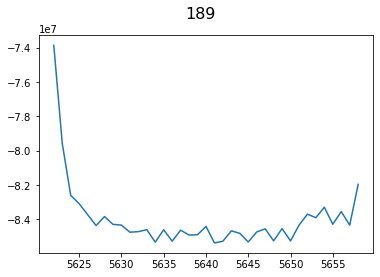

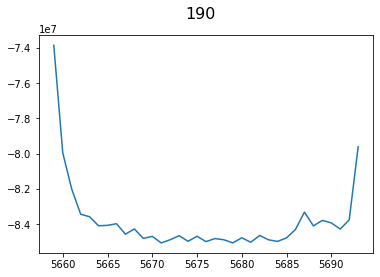

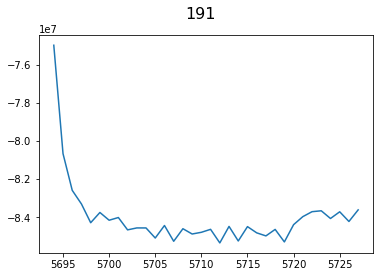

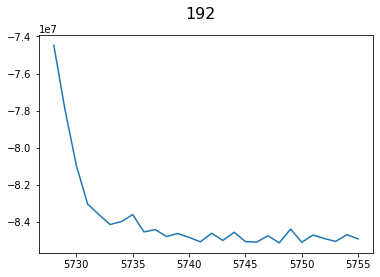

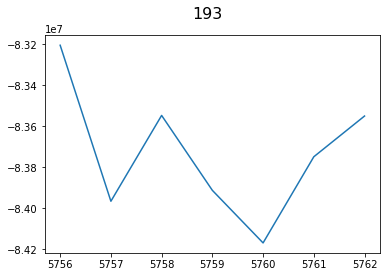

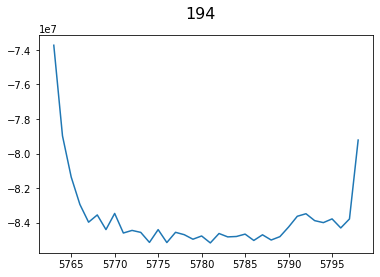

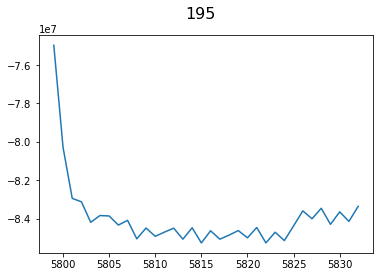

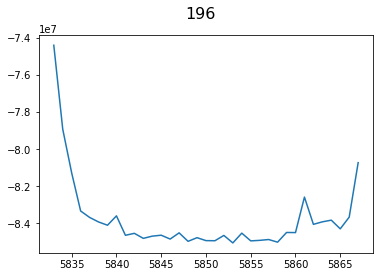

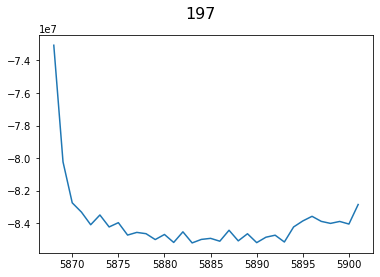

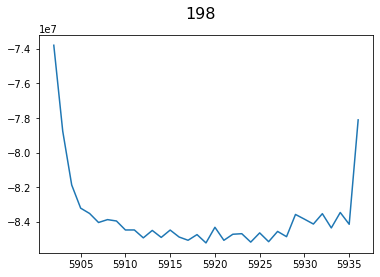

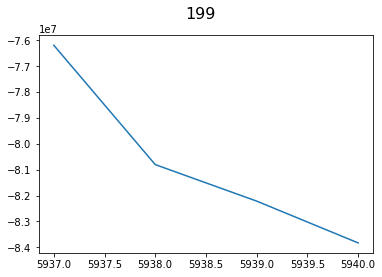

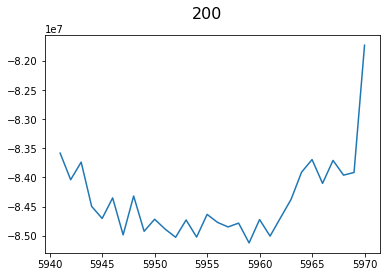

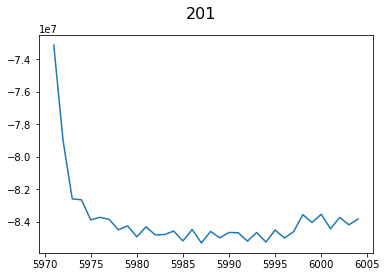

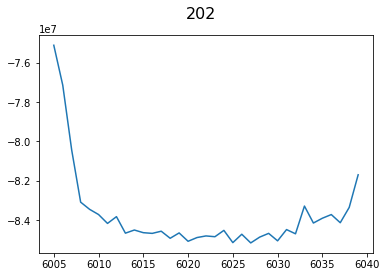

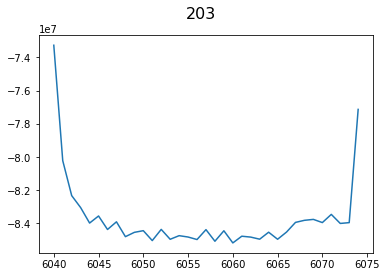

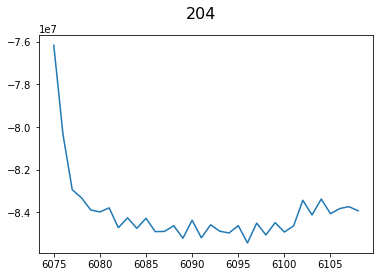

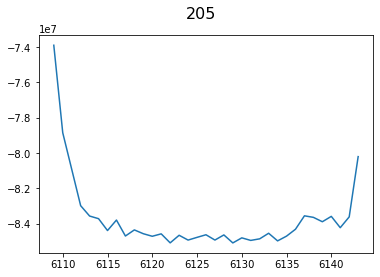

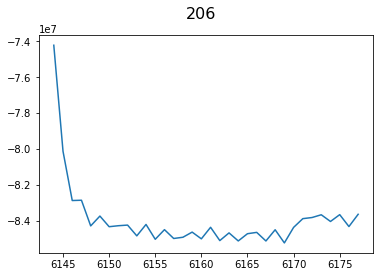

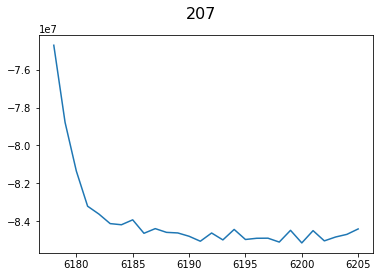

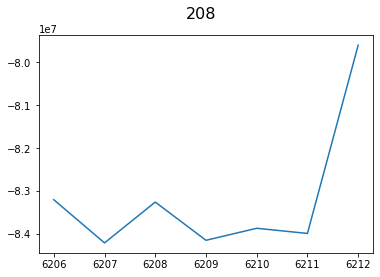

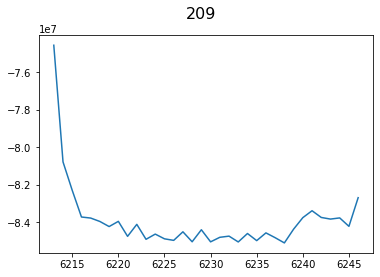

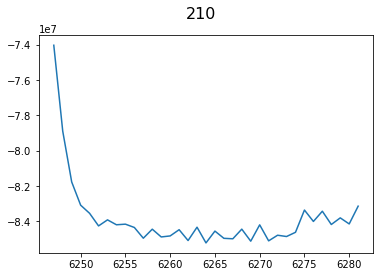

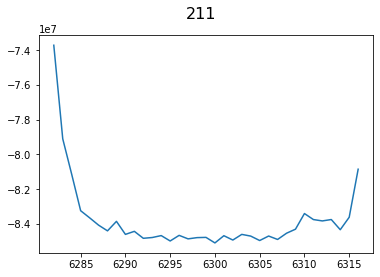

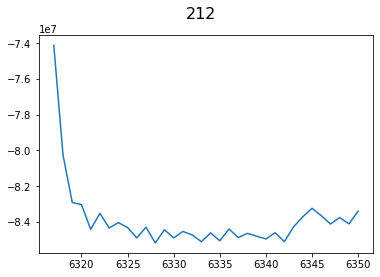

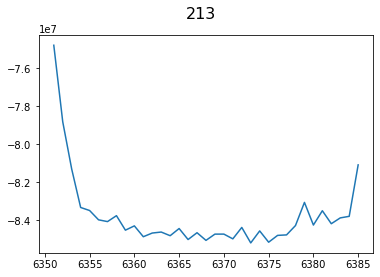

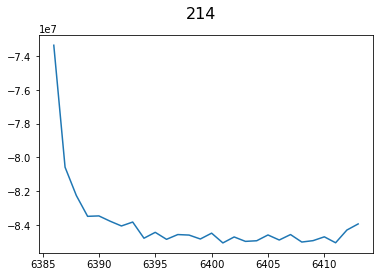

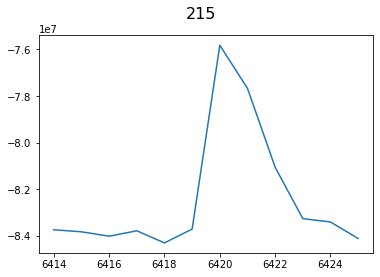

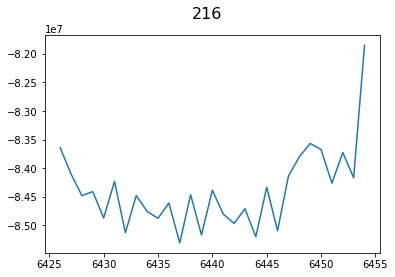

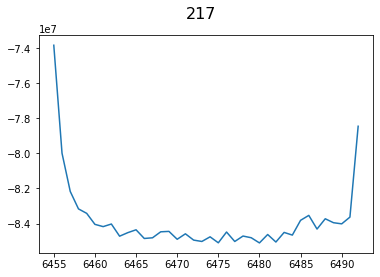

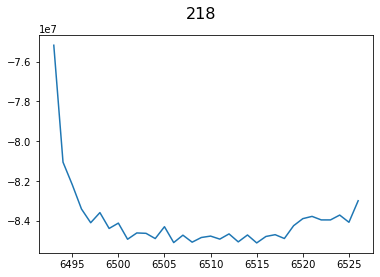

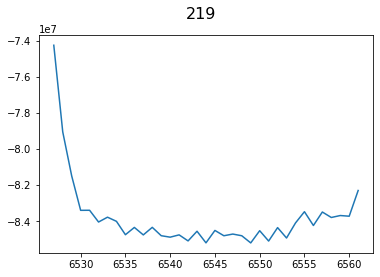

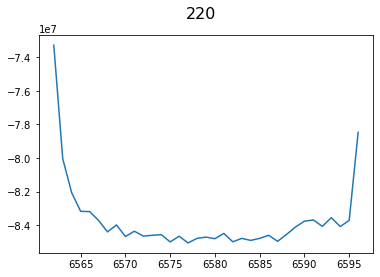

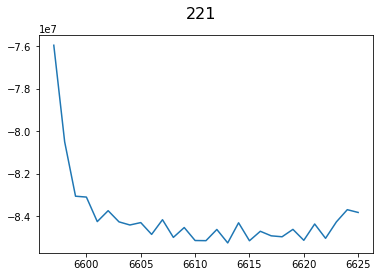

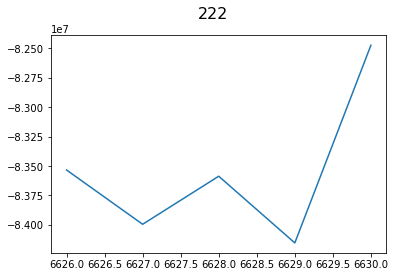

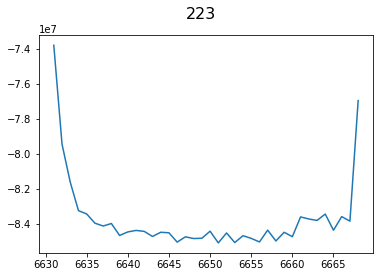

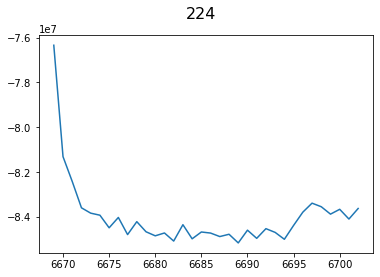

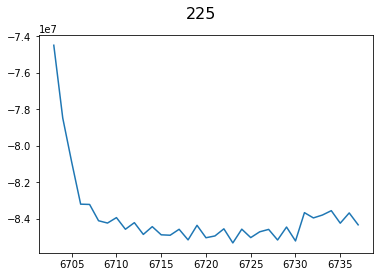

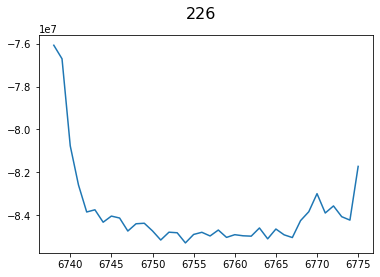

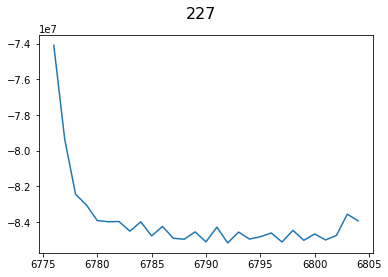

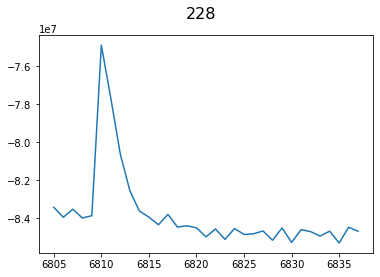

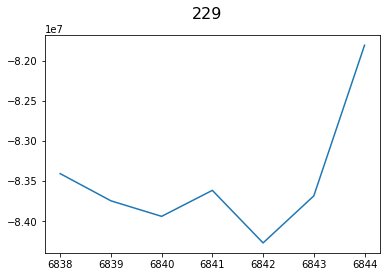

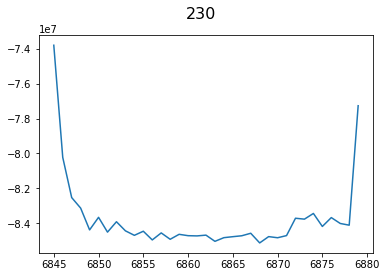

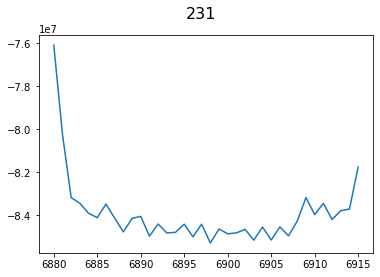

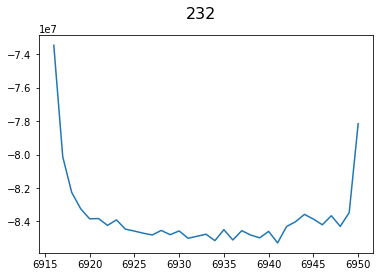

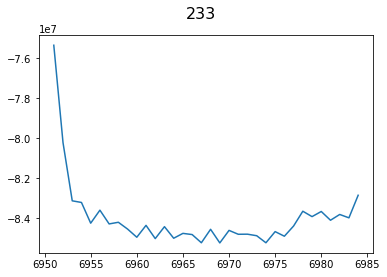

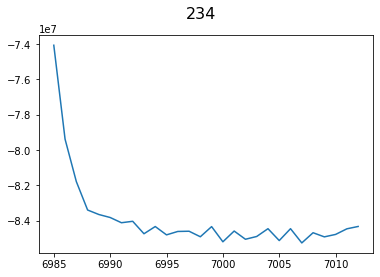

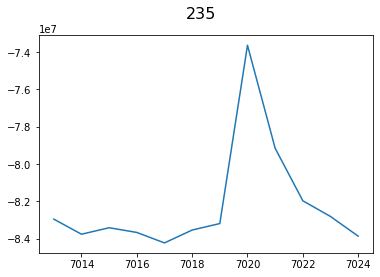

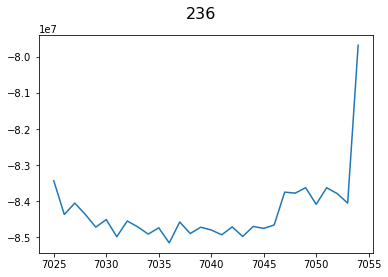

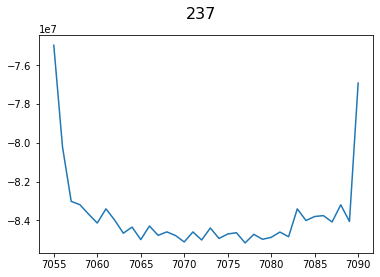

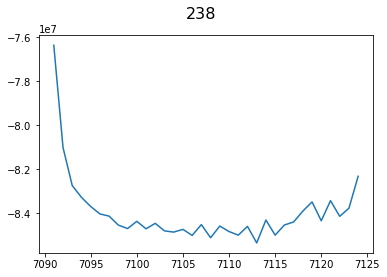

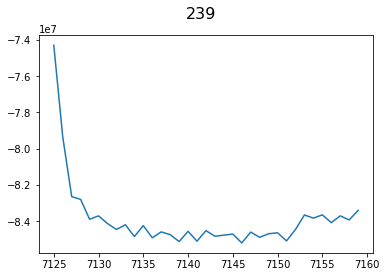

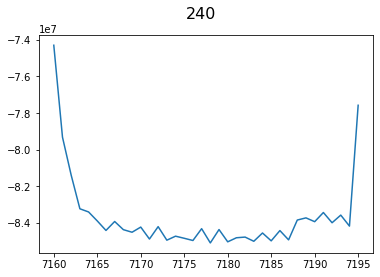

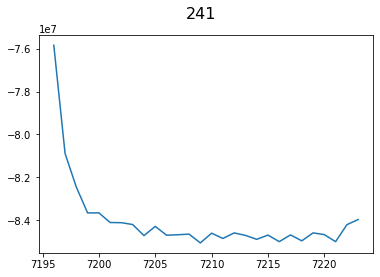

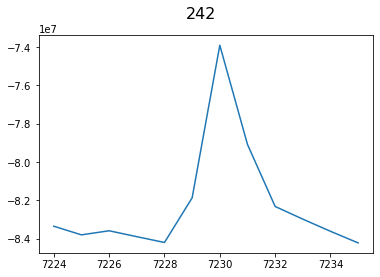

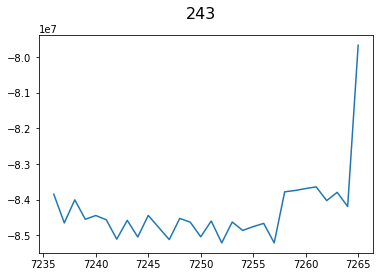

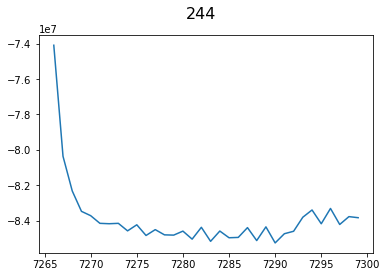

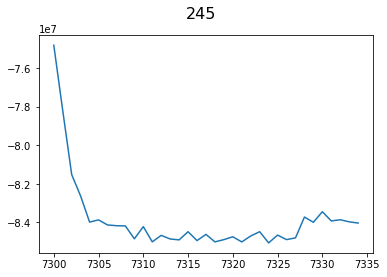

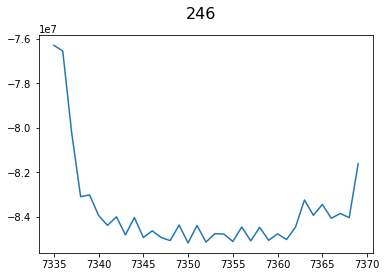

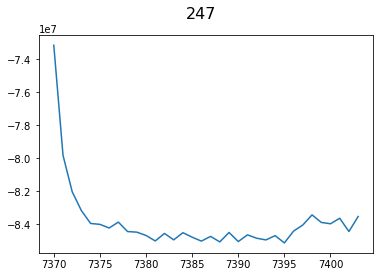

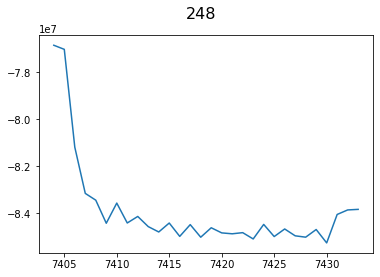

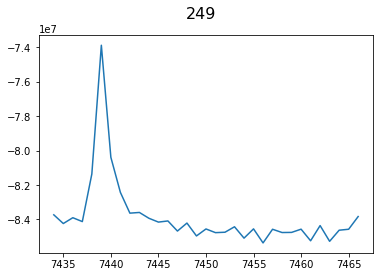

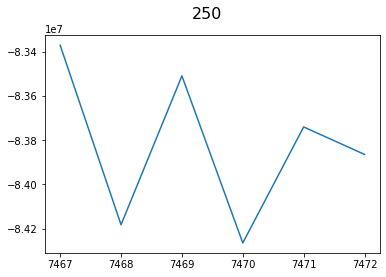

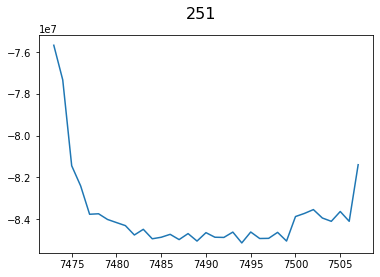

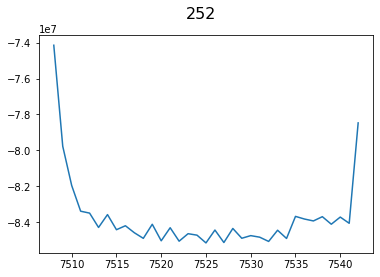

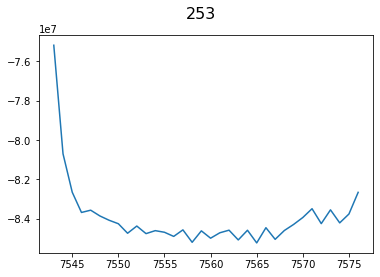

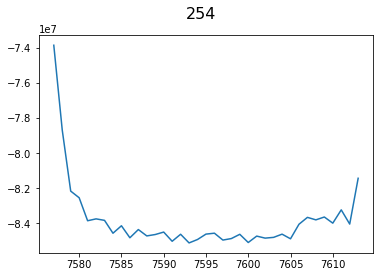

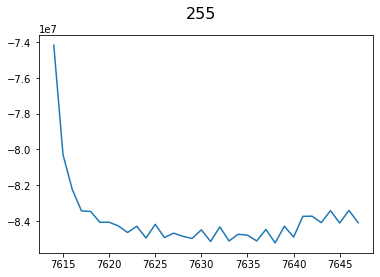

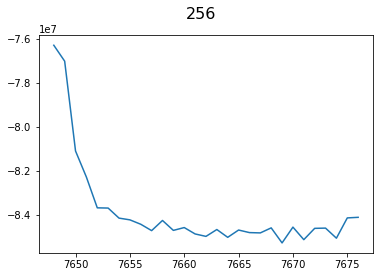

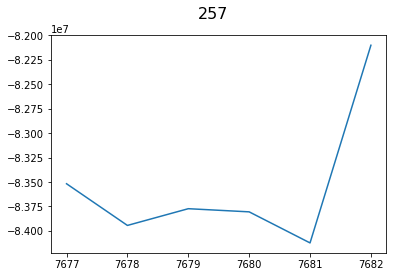

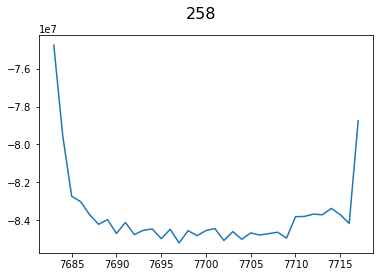

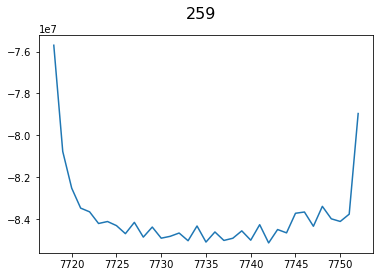

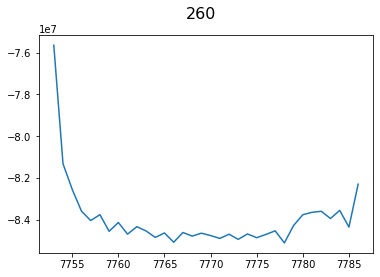

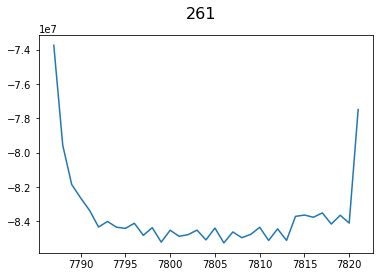

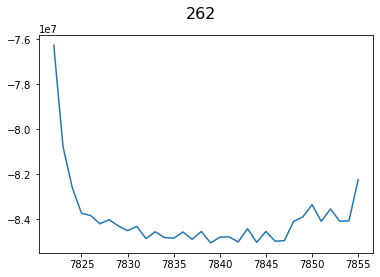

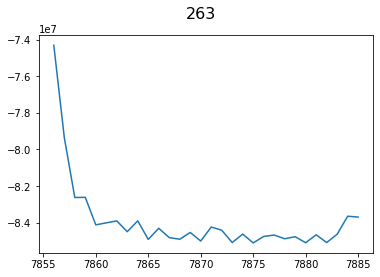

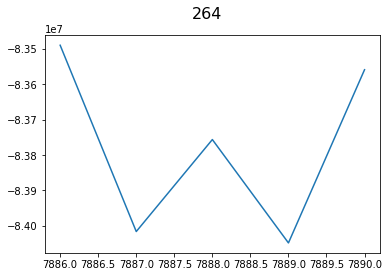

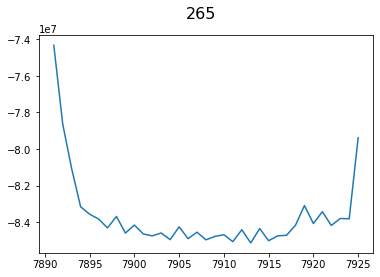

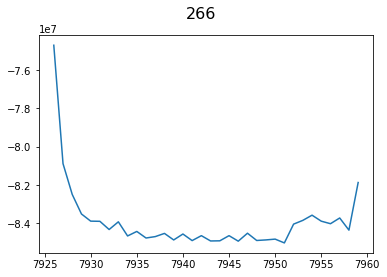

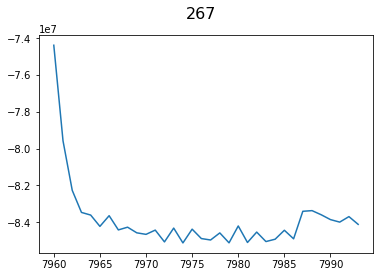

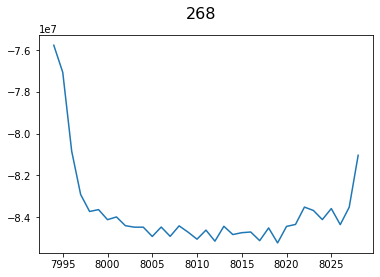

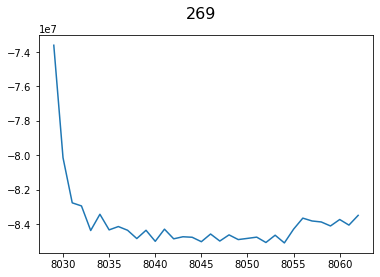

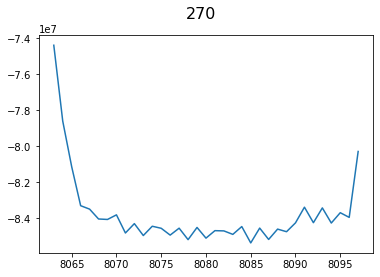

In [6]:
#data_frame_Cut_main = pd.read_csv("peak_con/tnt/200n/TNT_200ng.csv")
data_frame_Cut_main = pd.read_csv("sci/ng_10_200ng.csv")
#data_frame_Cut_main = pd.read_csv("sci/Normal_10.csv")
#print(data_frame_Cut_main)

cnt = 1
nsample = 0
Cut_data_main = data_frame_Cut_main[['0']]

peak_num_count_=[]
for c in range(len(peak_num_count)):
    peak_num_count_.append(int(peak_num_count[c]))
    #print(peak_num_count_)
peak_num_count_.append(0)
#for c in range(math.ceil(len(Cut_data_main)/4455)-1):
#for c in range(math.ceil(len(Cut_data_main)/15)-1):
for c in range(math.ceil(len(Cut_data_main)/30)-1):
    nc1 = peak_num_count_[c-1]
    nc2 = peak_num_count_[c]
    if nc1 != nc2:
        gg = Cut_data_main[nc1:nc2]
        gg_=np.array(gg)
        save_data=pd.DataFrame(gg_)
        #save_data.to_csv('peak_con/tnt/200n/csv/TNT_200ng_%d.csv'% (cnt), encoding='utf-8', index=False)
        save_data.to_csv('sci/농도별데이터_2022/NG/200ng/200_10/NG_200ng_10_%d.csv'% (cnt), encoding='utf-8', index=False)
        #save_data.to_csv('sci/농도별데이터_2022/Normal/10_10/Normal_10_%d.csv'% (cnt), encoding='utf-8', index=False)
        plt.plot(gg)
        plt.suptitle(cnt, y=0.98, fontsize=16)
        plt.show()
        ''' 
        scaler = MinMaxScaler()
        scaler_fit = scaler.fit(gg)
        scaler_data = scaler.transform(gg)
        
        
        gasf = GramianAngularField(image_size=1, method='summation')
        X_gasf = gasf.fit_transform(gg_new)
        print(X_gasf)
        gadf = GramianAngularField(image_size=1, method='difference')
        X_gadf = gadf.fit_transform(gg_new)
        
        gaf = GramianAngularField(image_size=1)
        
        im_gg = gaf.fit_transform(scaler_data)
        print(im_gg)
        plt.imshow(im_gg[0])
        plt.show()
        '''
        
        #plt.imshow(gg_1)
        #plt.savefig('Concentration_IMS/RDX_10ng/RDX_10ng_%d.png'% (c))
        cnt = cnt + 1

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
C:\Users\user\anaconda3\envs\makedata\lib\site-packages\mpl_toolkits\axes_grid1\axes_grid.py:46: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from .colorbar import Colorbar


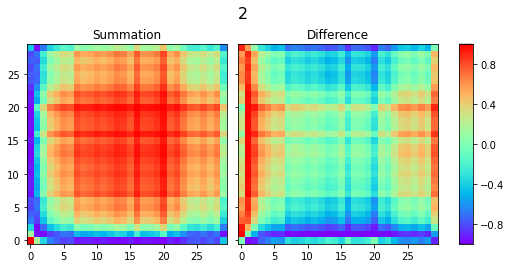

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


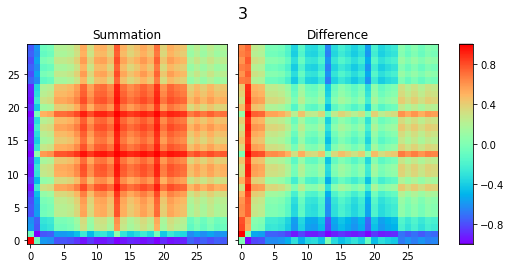

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


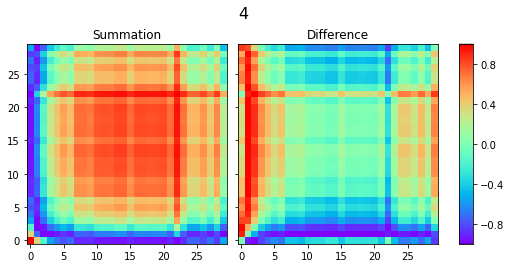

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


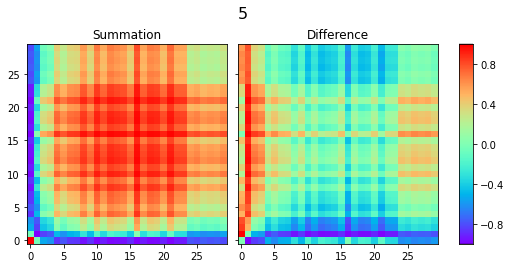

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


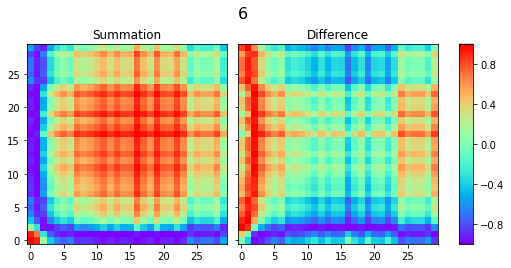

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


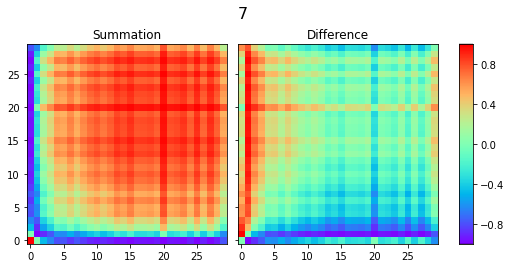

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


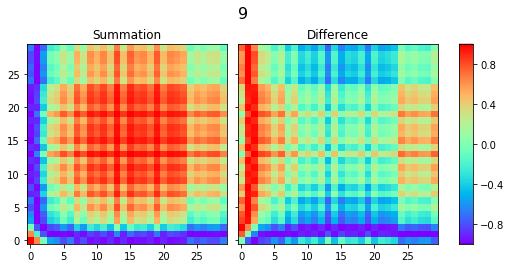

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


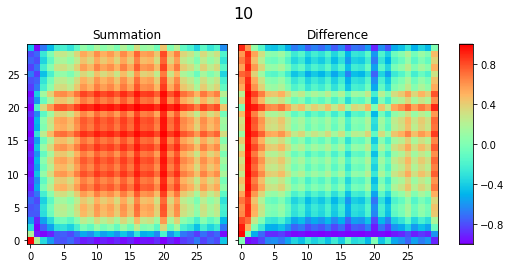

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


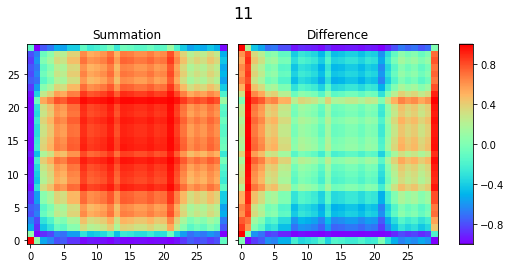

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


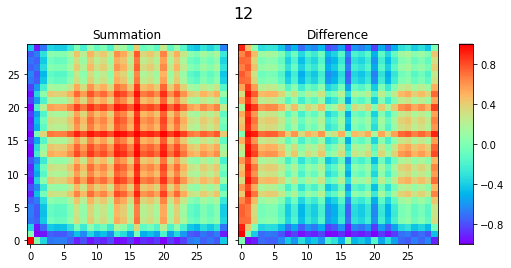

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


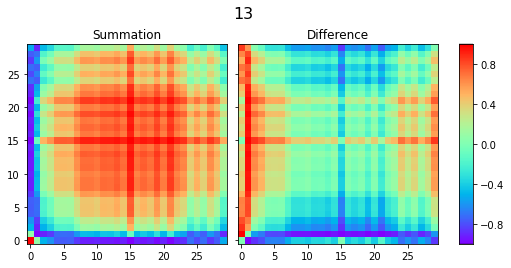

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


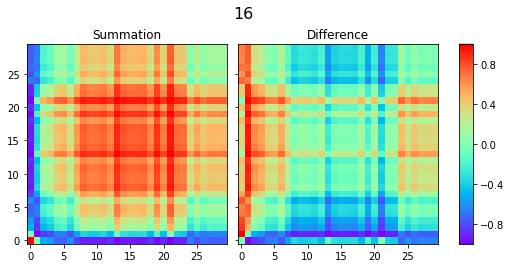

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


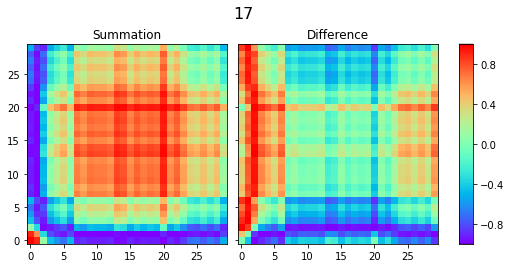

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


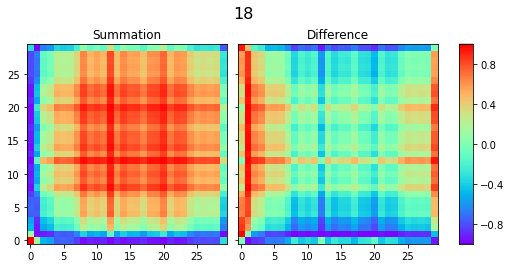

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


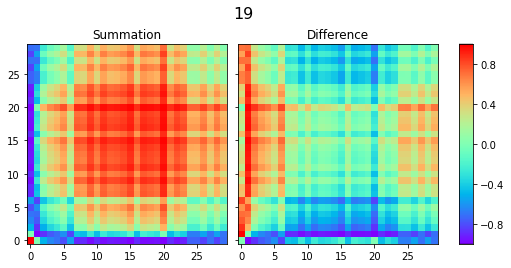

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


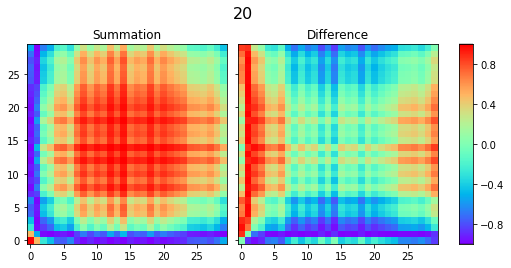

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


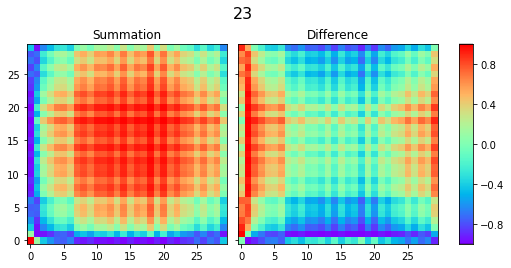

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


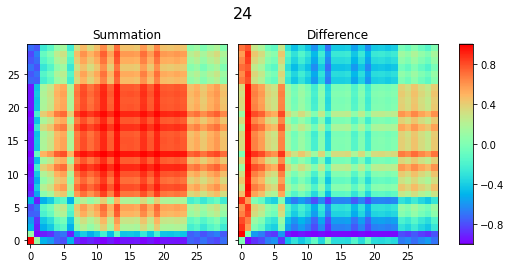

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


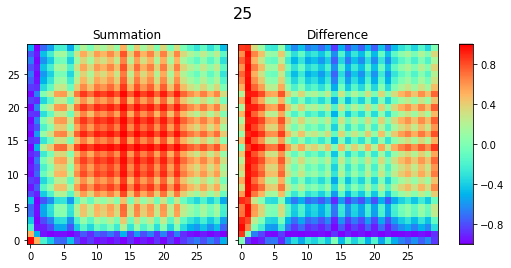

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


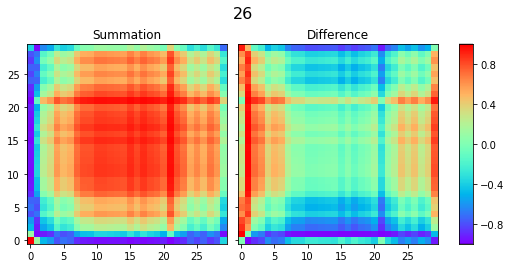

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


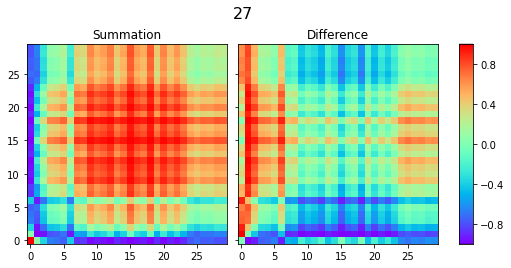

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


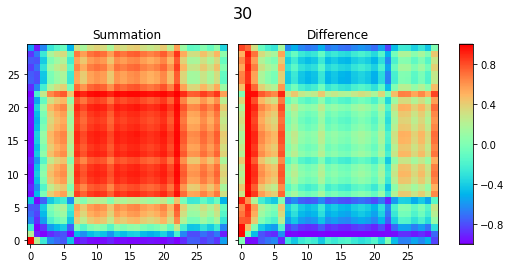

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


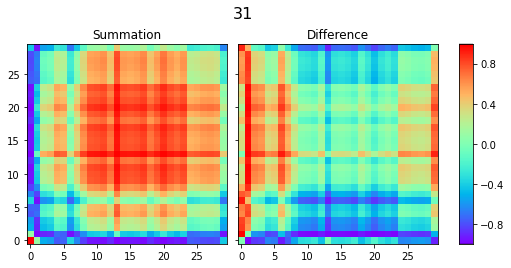

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


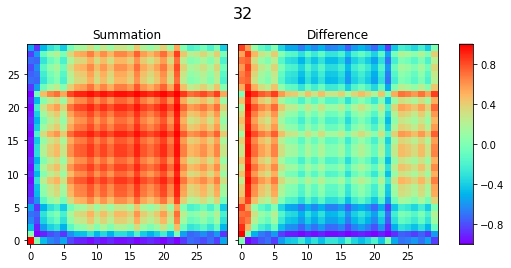

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


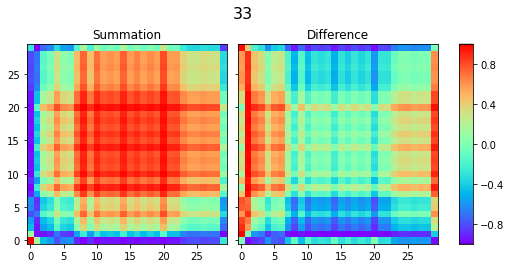

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


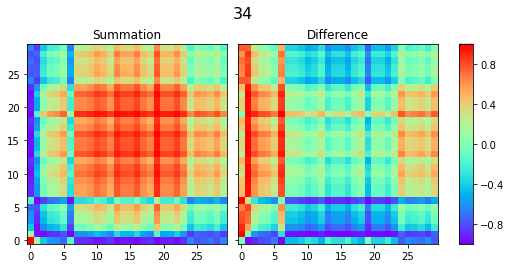

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


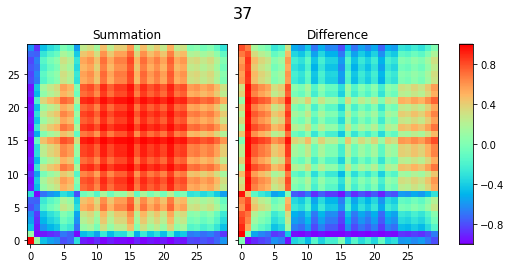

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


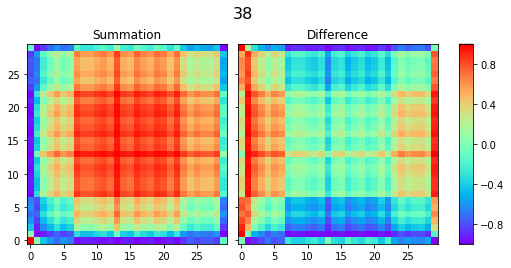

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


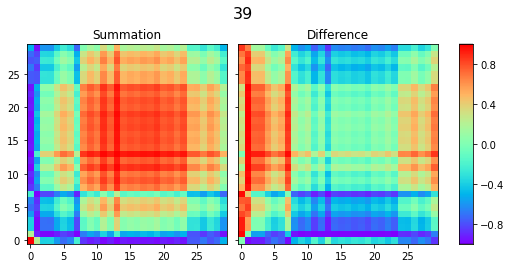

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


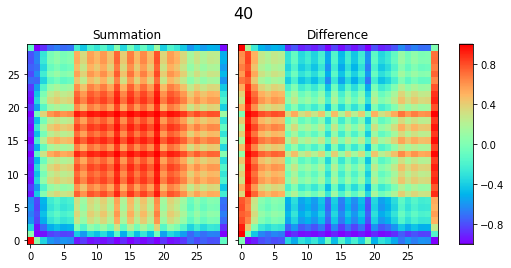

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


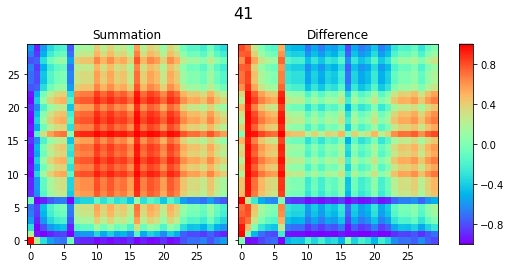

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


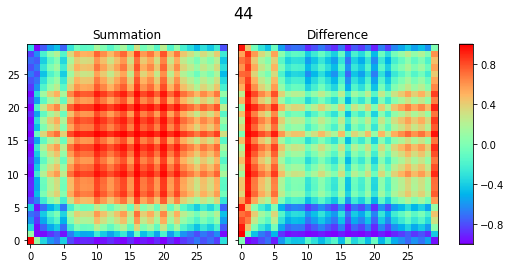

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


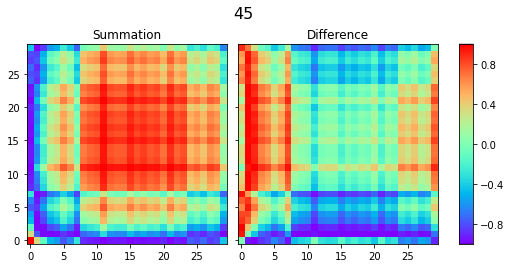

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


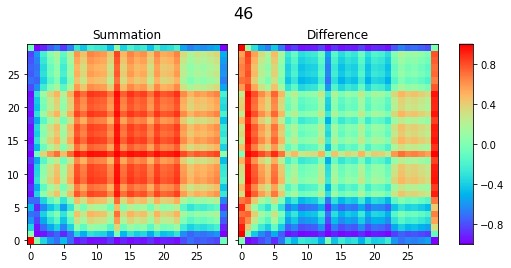

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


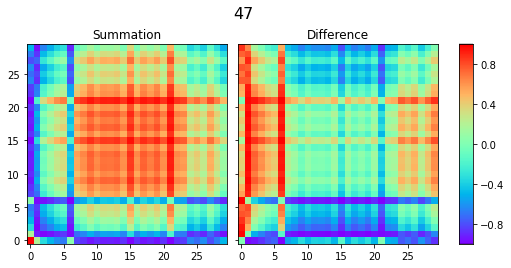

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


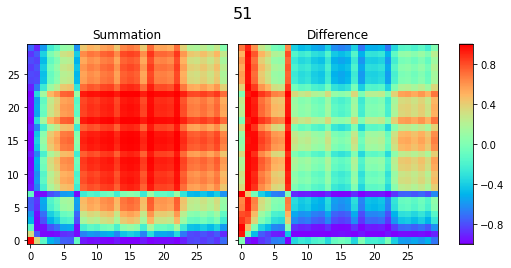

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


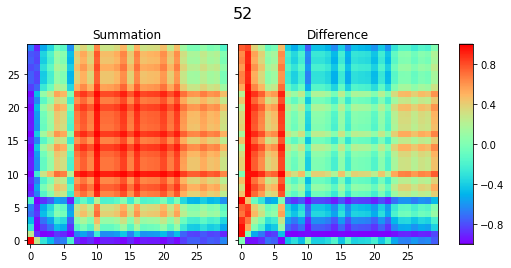

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


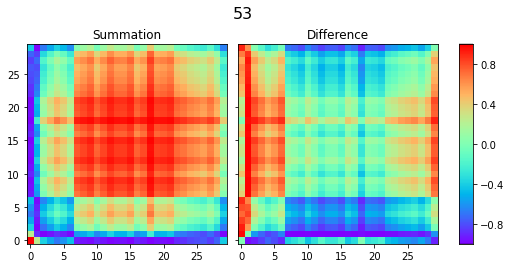

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


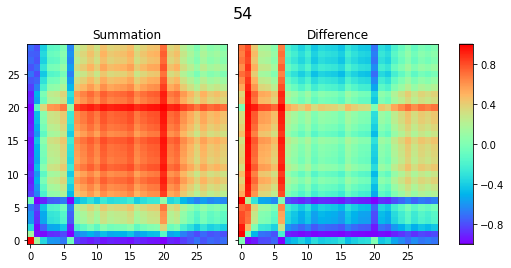

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


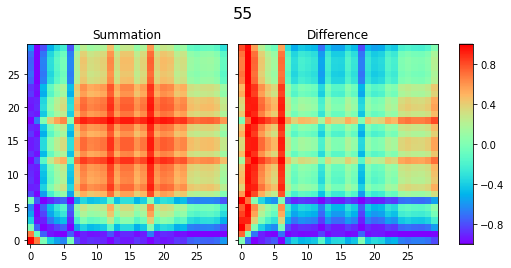

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


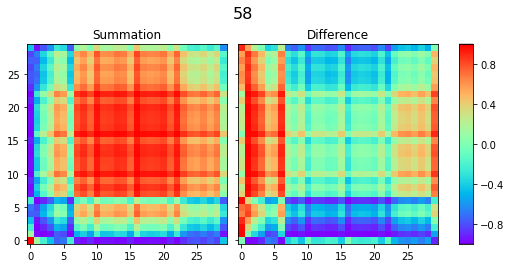

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


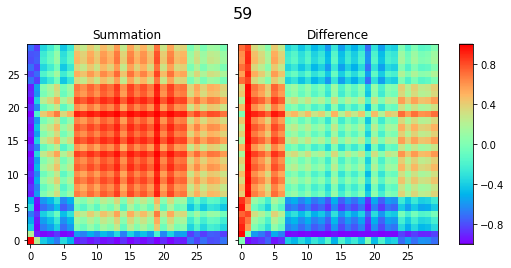

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


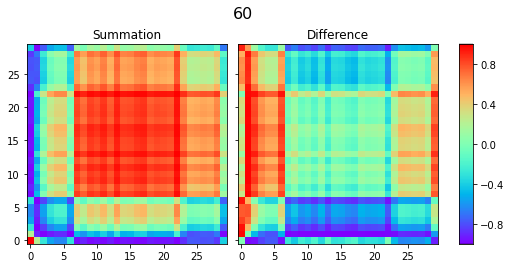

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


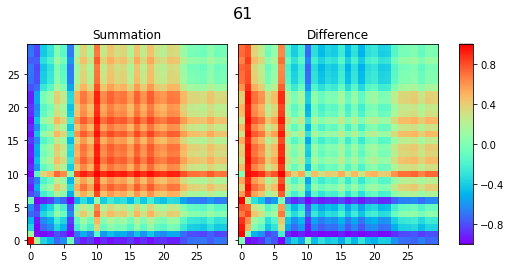

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


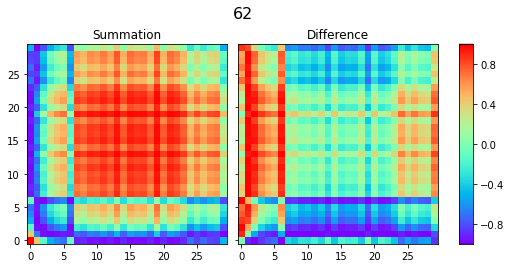

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


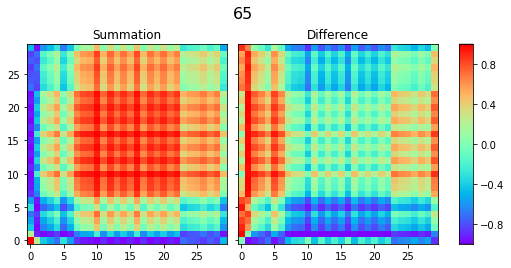

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


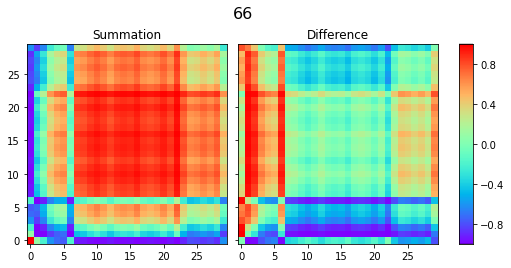

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


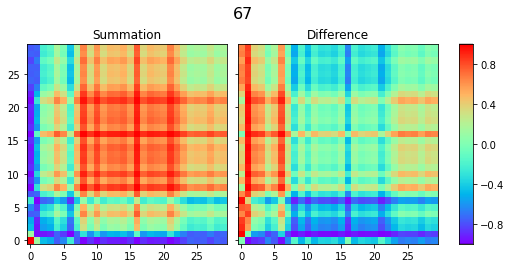

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


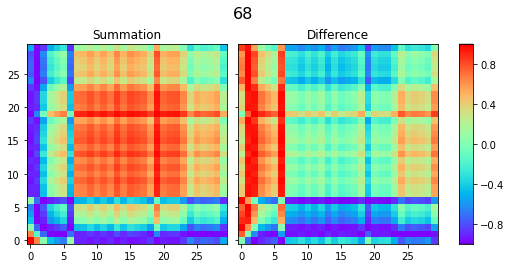

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


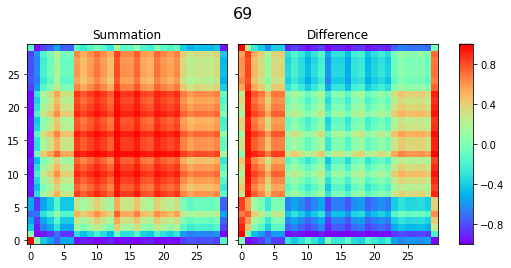

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


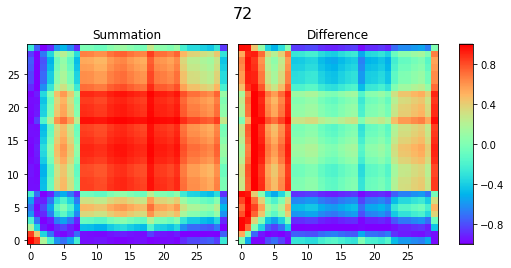

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


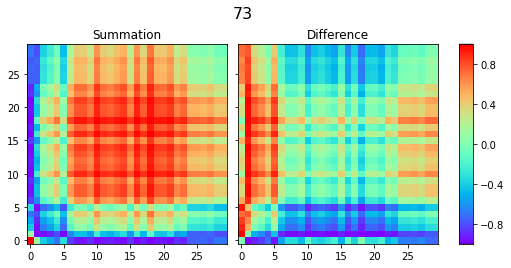

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


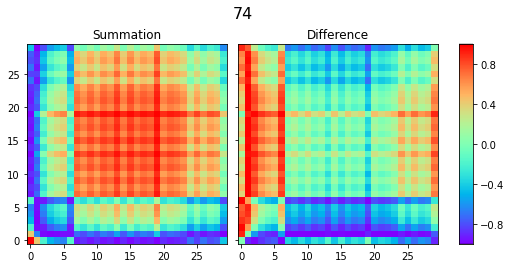

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


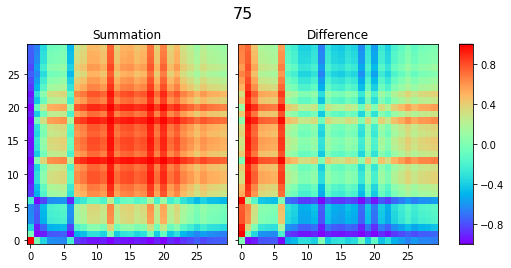

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


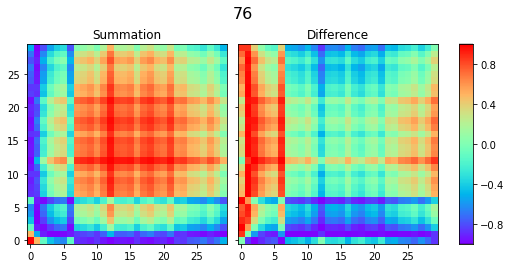

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


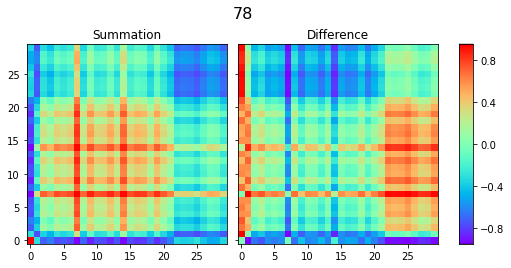

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


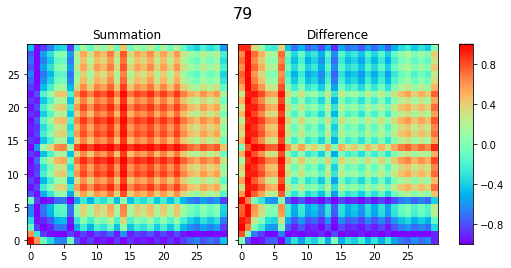

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


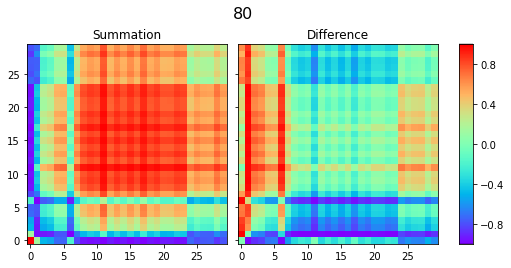

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


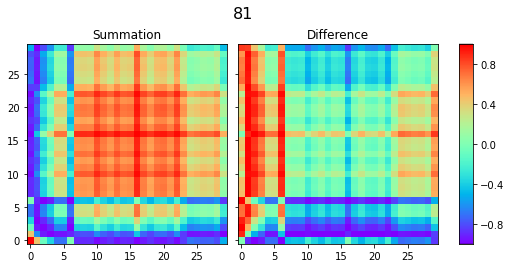

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


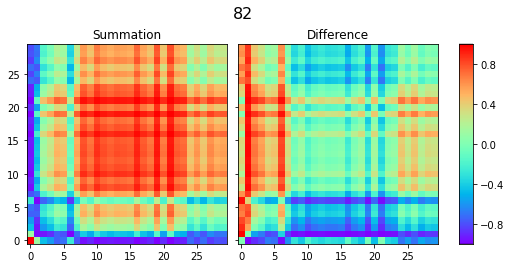

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


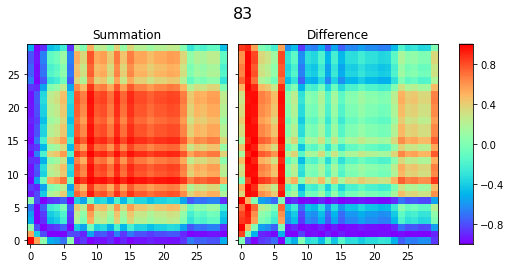

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


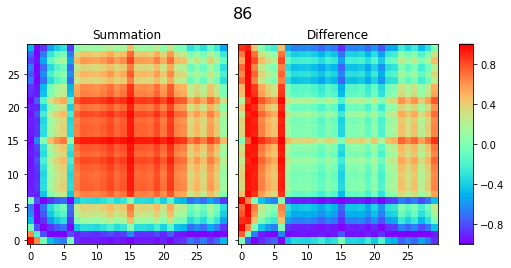

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


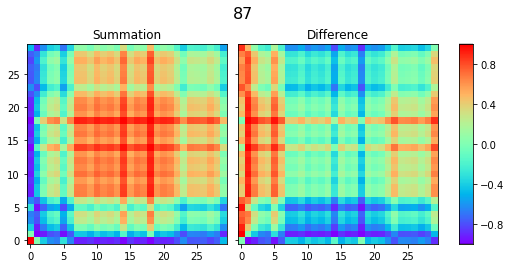

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


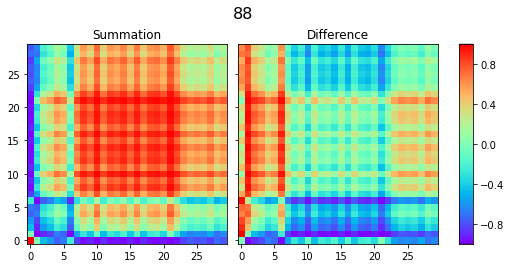

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


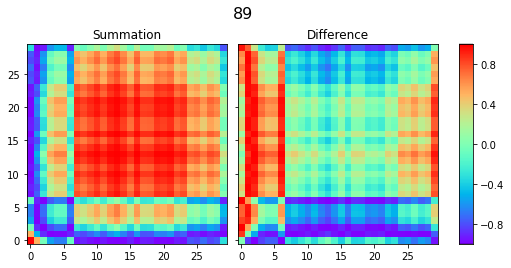

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


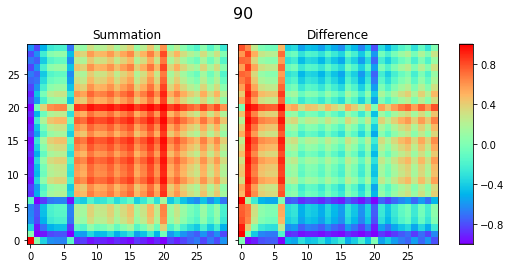

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


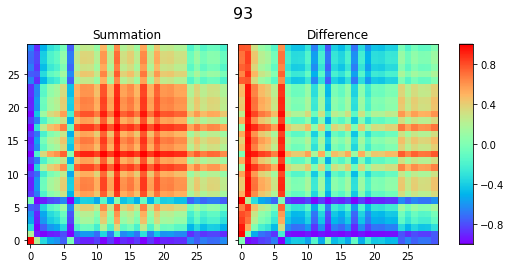

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


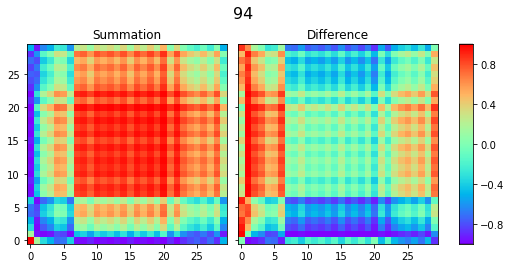

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


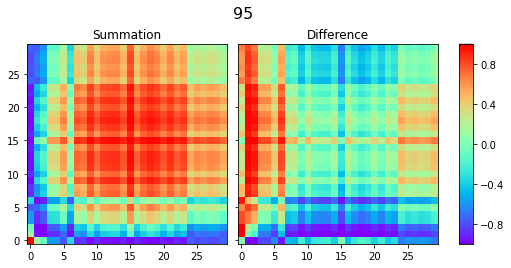

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


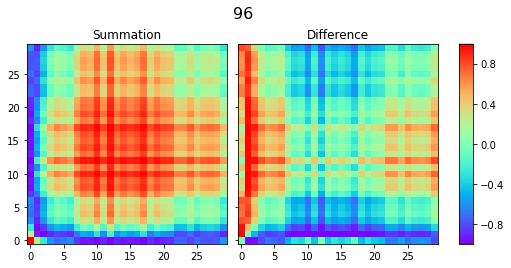

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


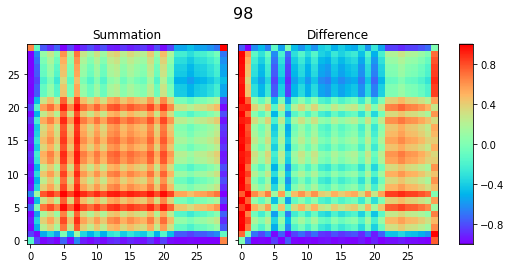

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


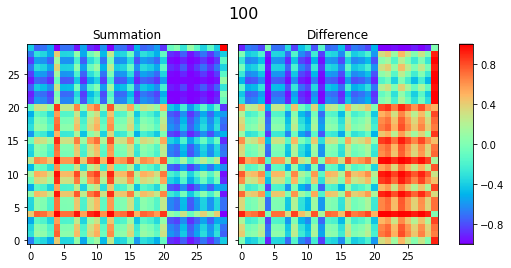

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


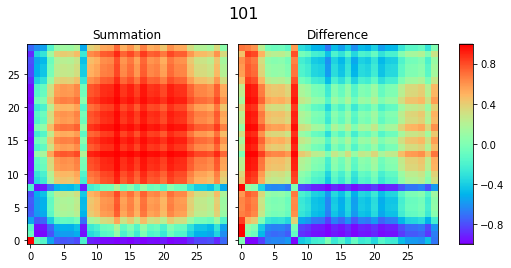

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


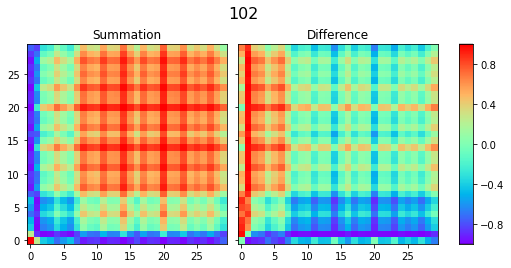

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


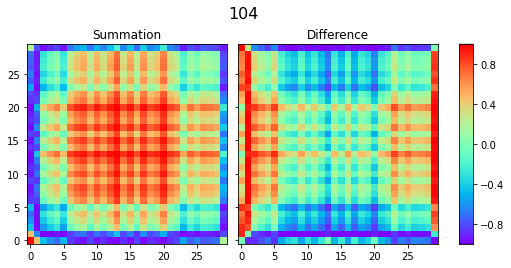

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


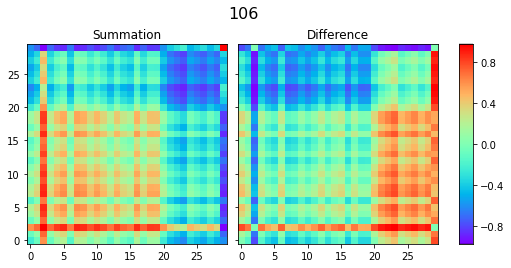

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


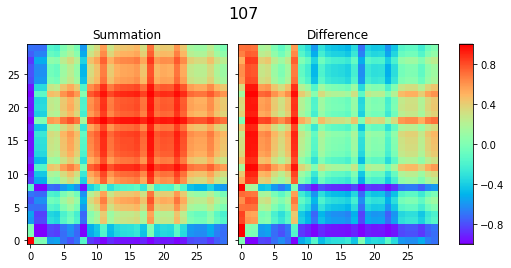

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


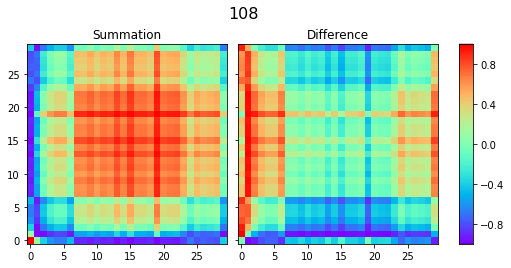

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


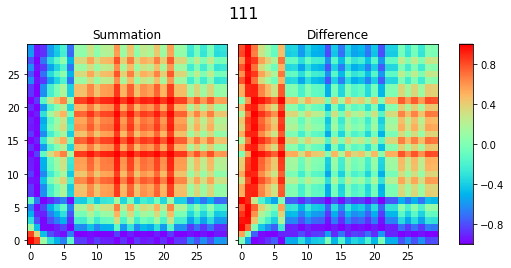

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


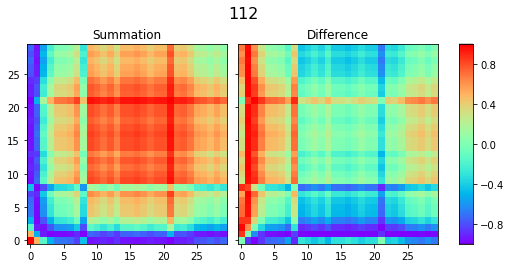

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


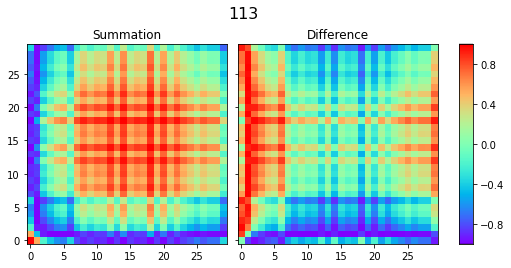

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


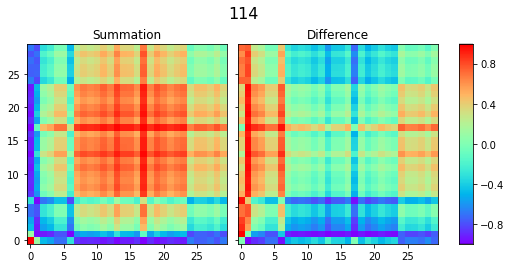

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


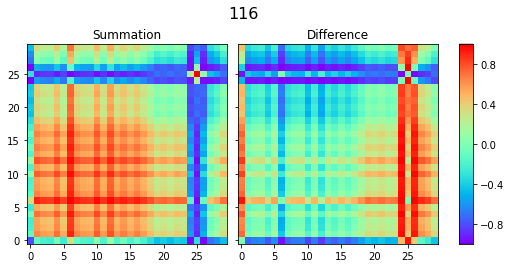

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


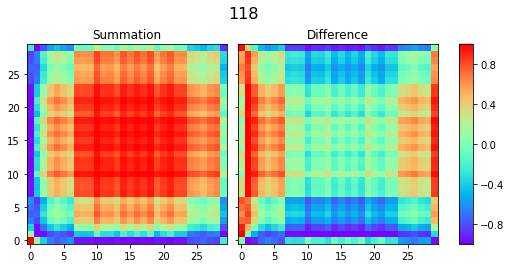

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


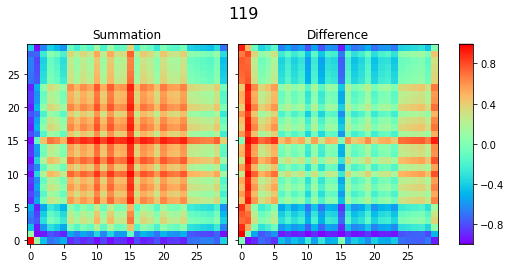

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


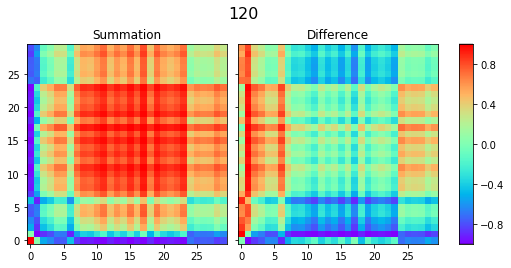

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


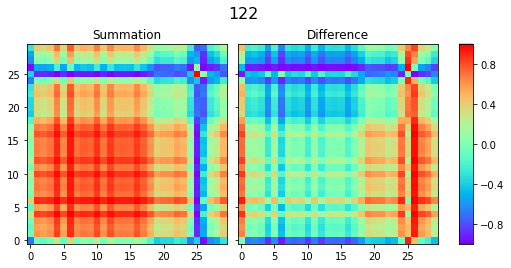

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


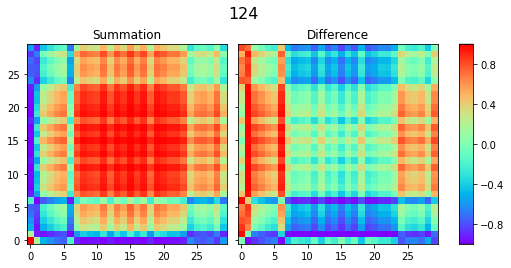

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


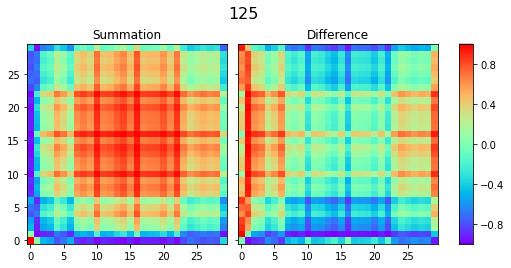

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


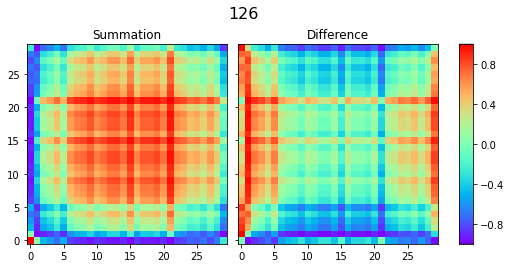

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


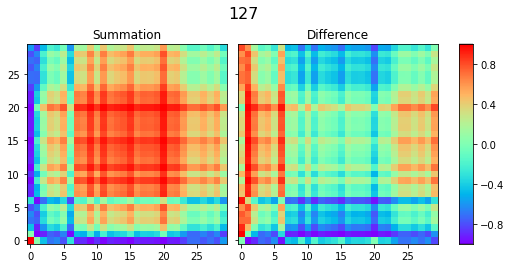

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


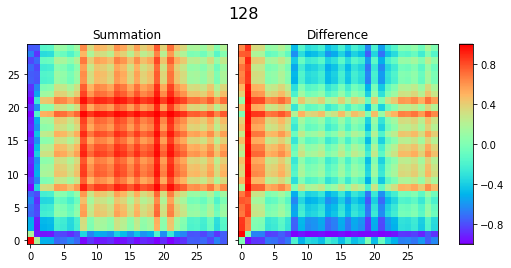

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


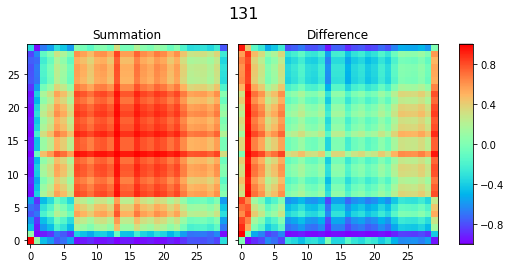

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


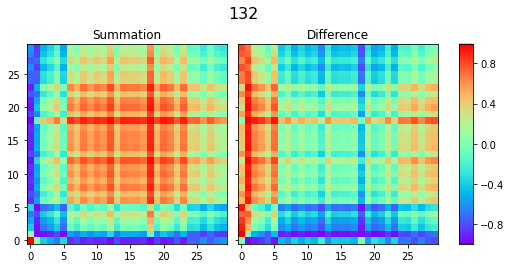

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


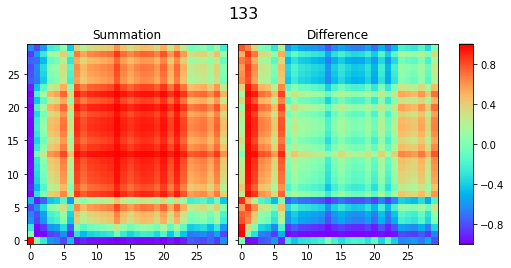

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


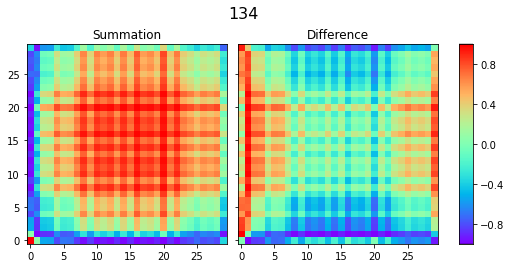

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


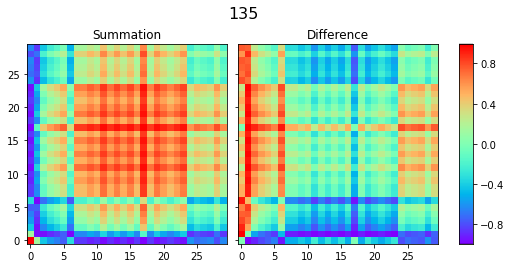

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


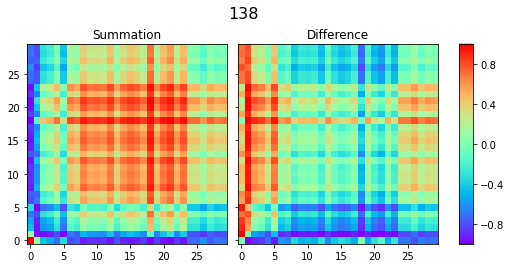

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


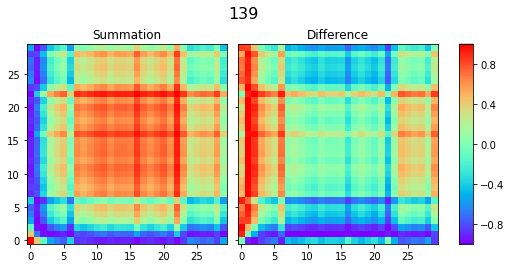

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


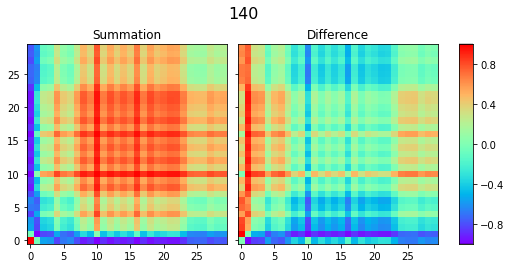

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


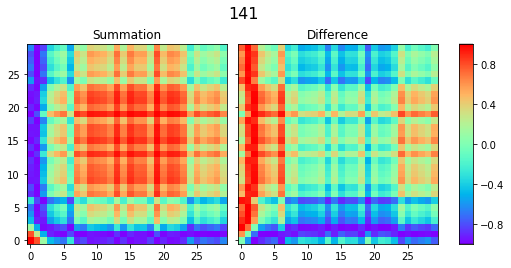

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


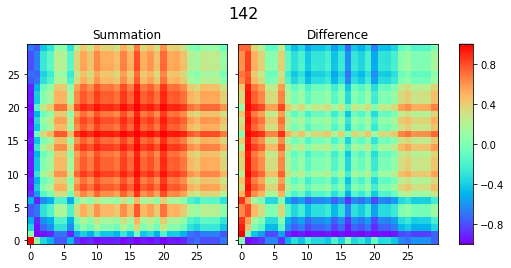

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


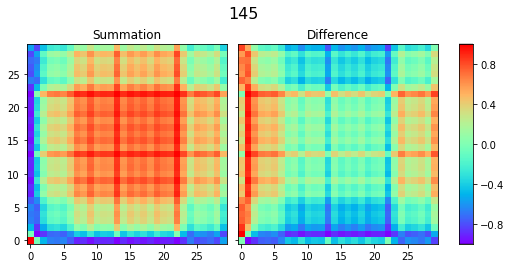

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


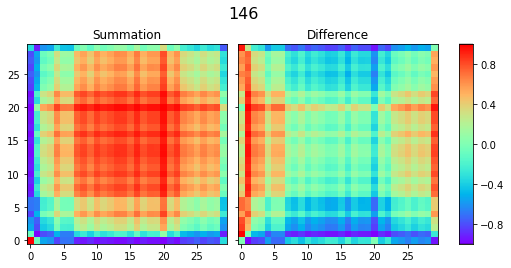

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


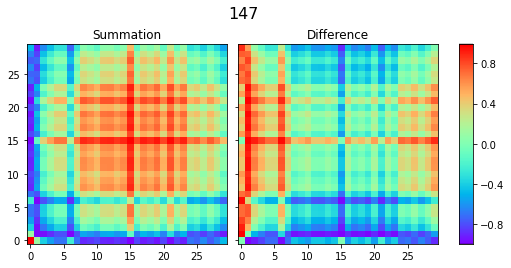

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


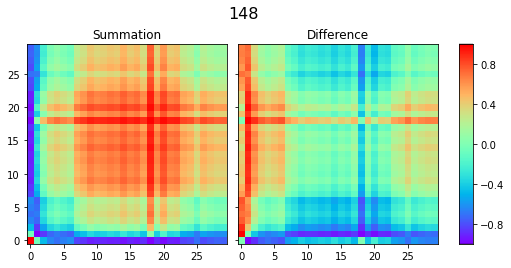

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


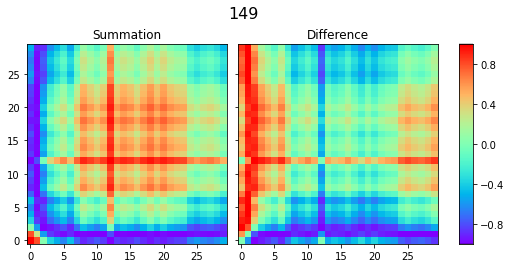

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


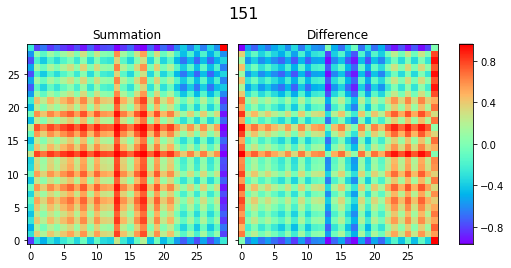

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


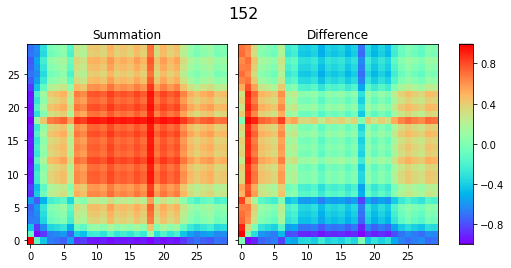

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


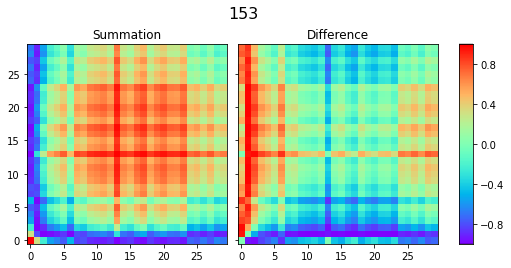

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


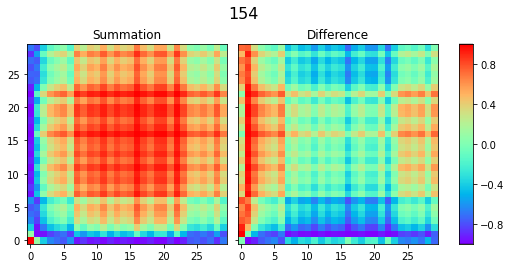

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


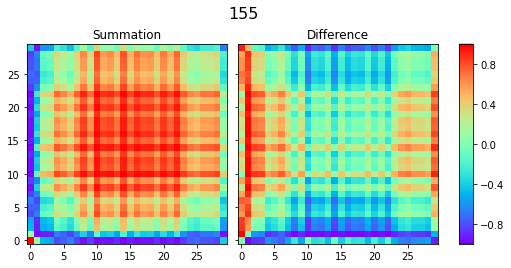

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


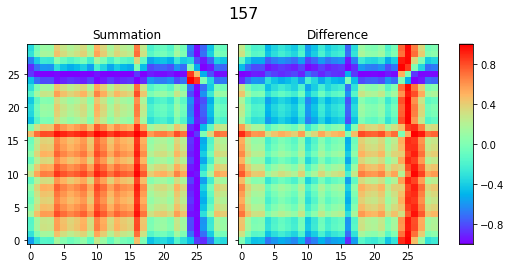

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


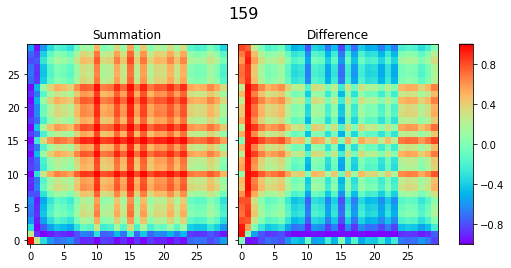

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


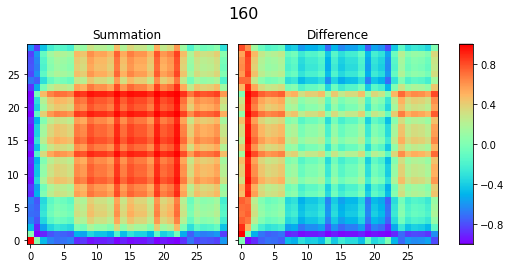

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


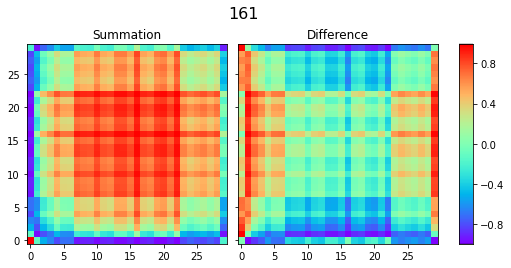

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


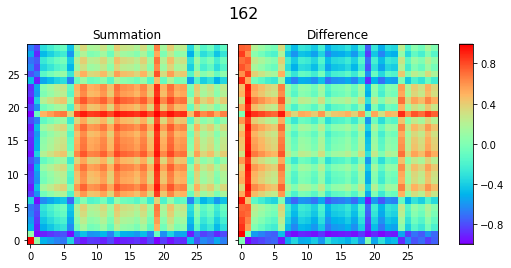

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


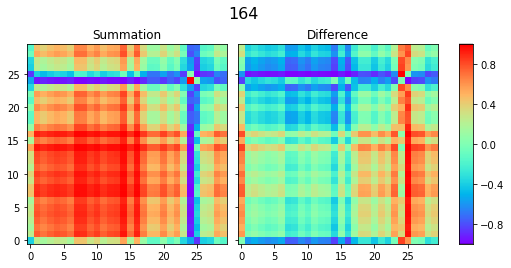

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


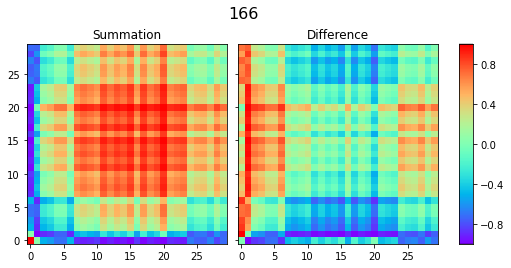

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


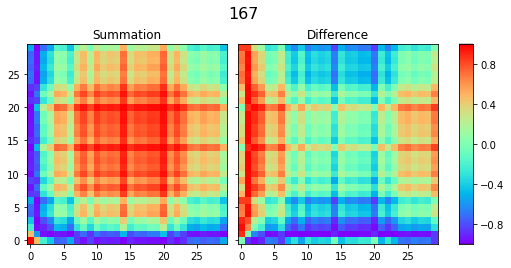

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


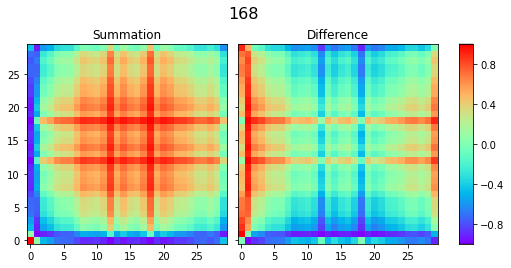

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


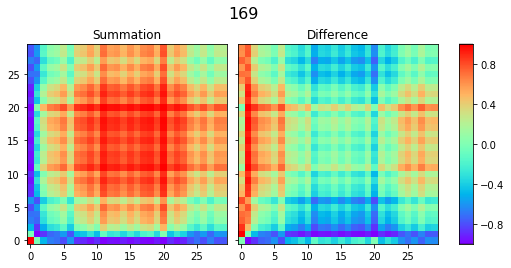

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


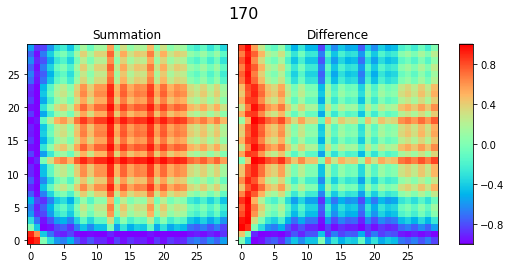

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


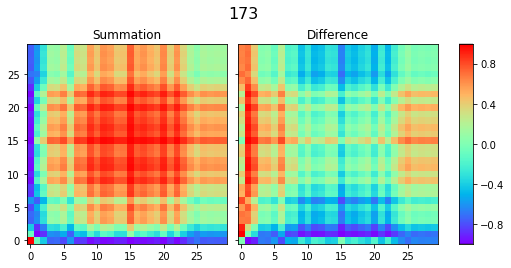

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


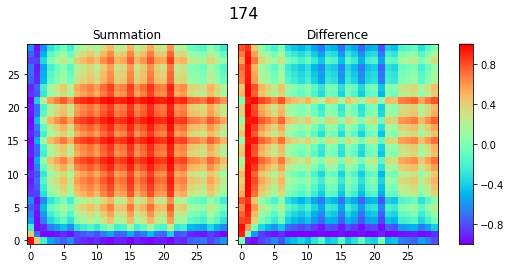

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


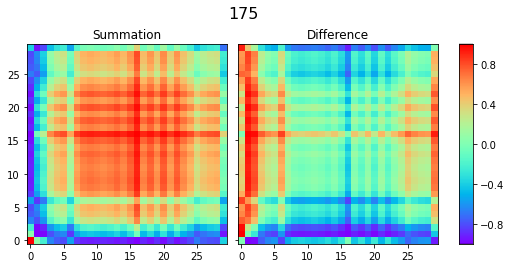

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


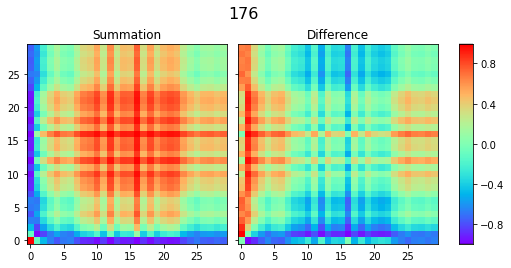

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


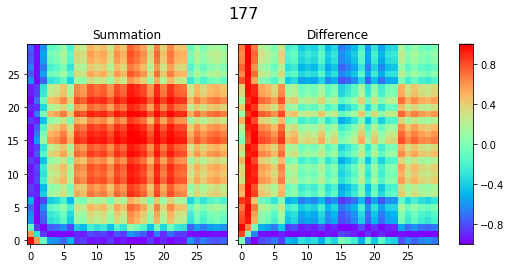

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


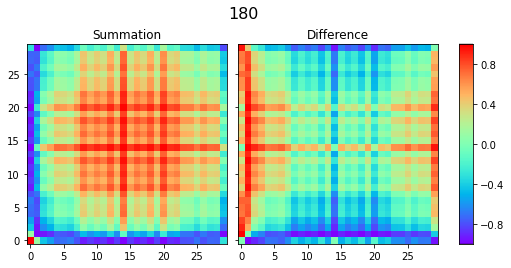

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


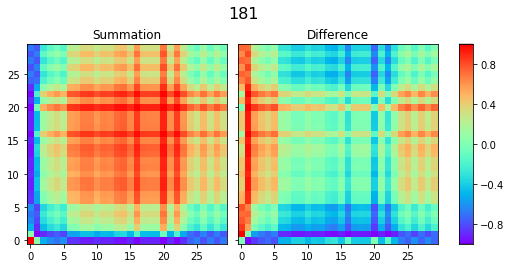

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


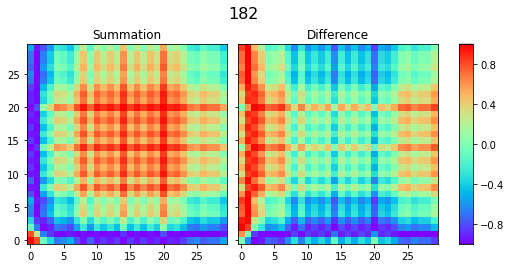

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


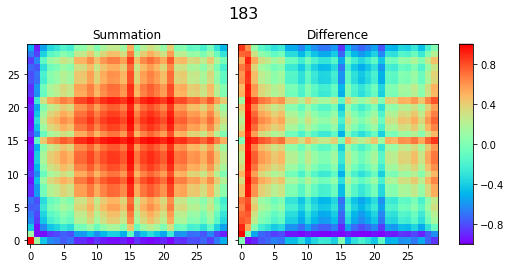

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


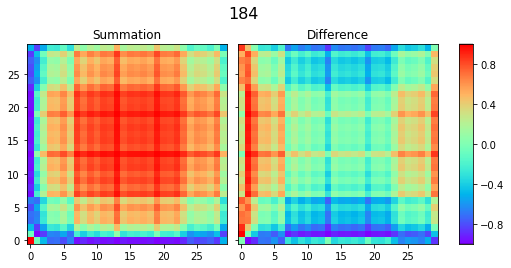

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


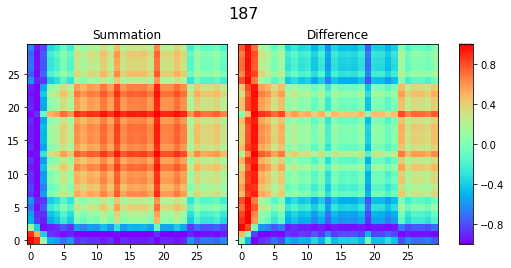

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


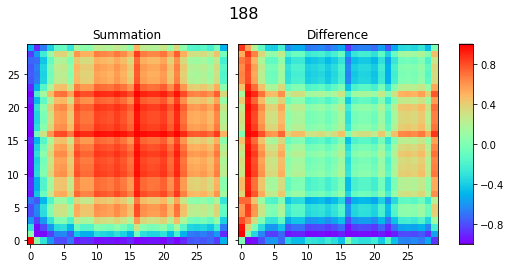

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


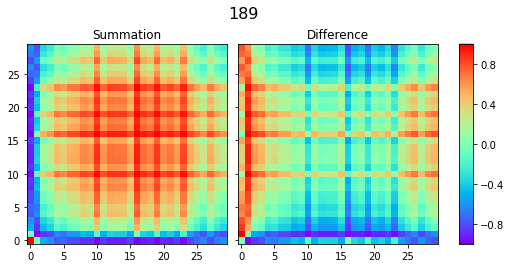

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


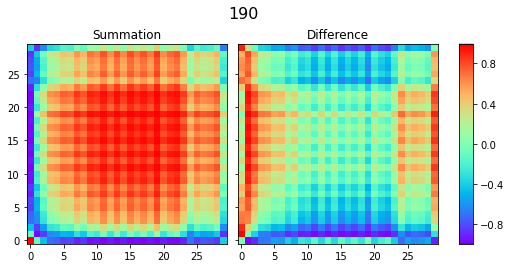

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


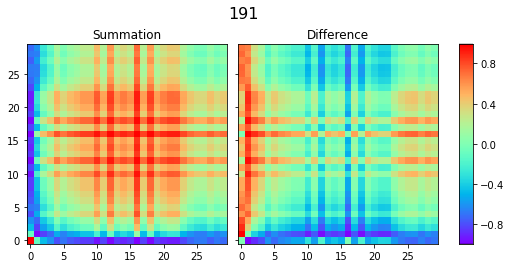

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


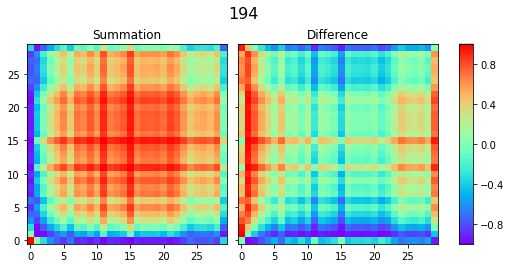

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


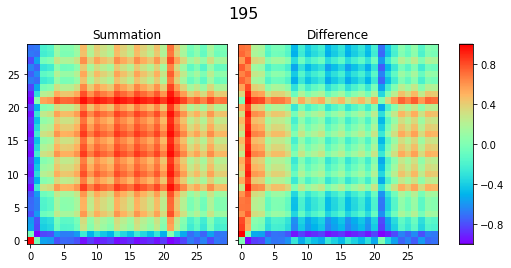

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


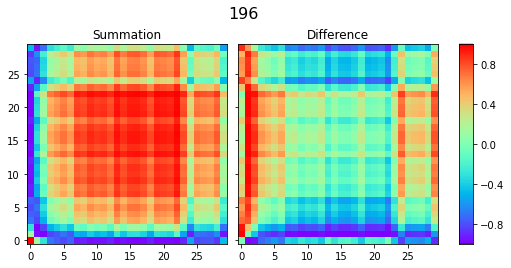

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


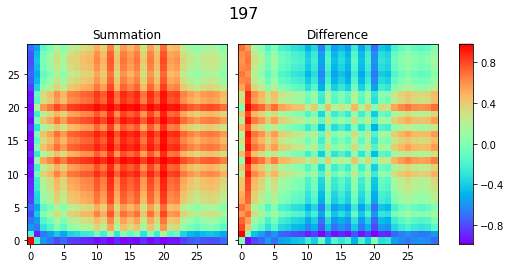

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


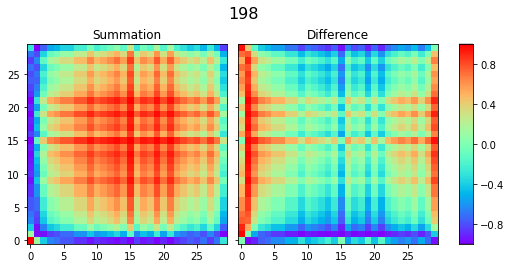

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


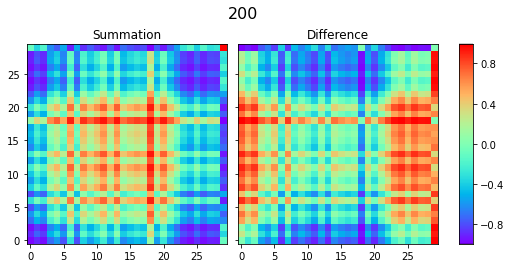

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


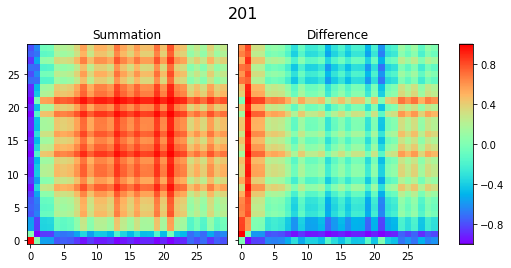

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


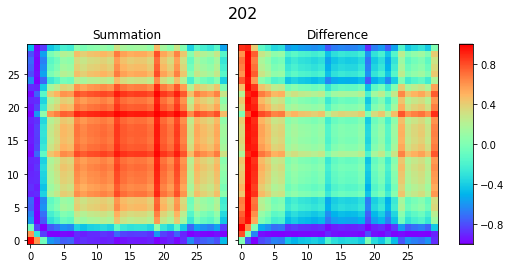

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


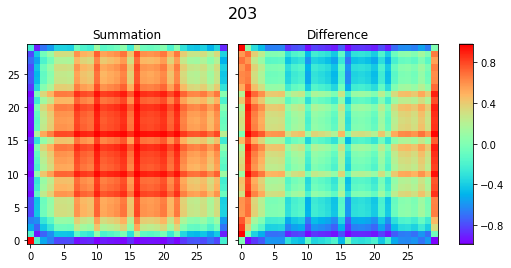

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


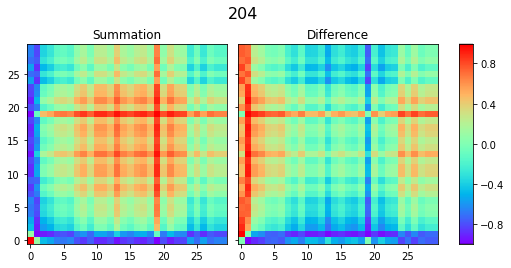

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


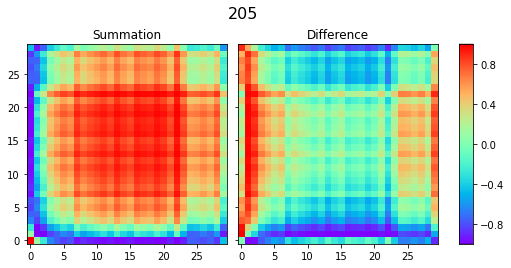

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


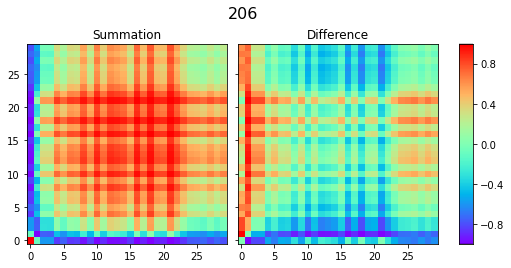

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


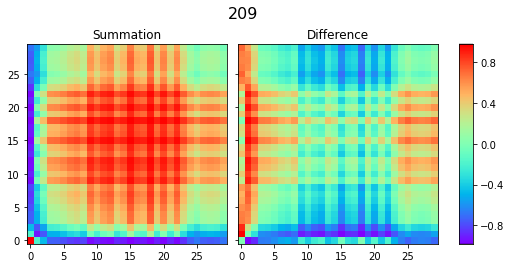

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


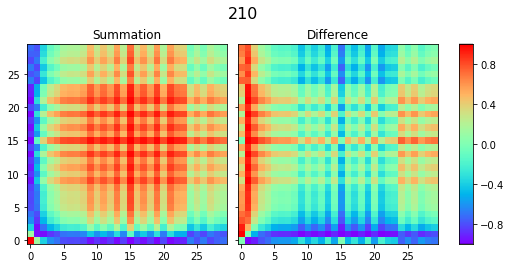

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


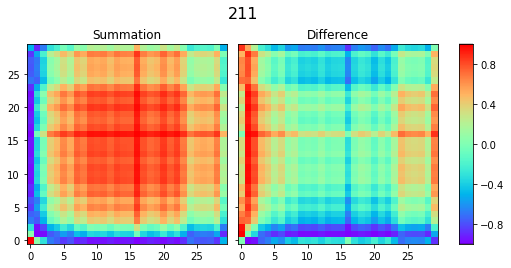

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


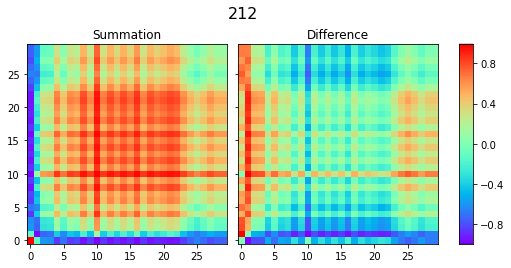

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


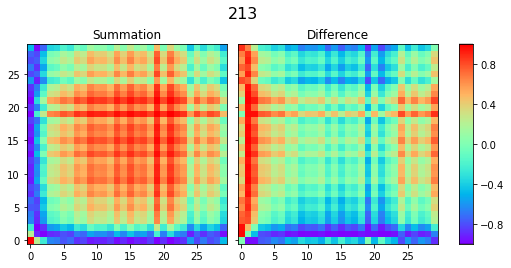

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


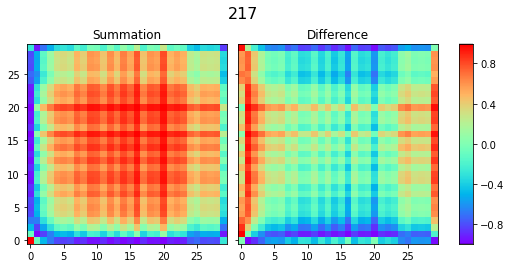

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


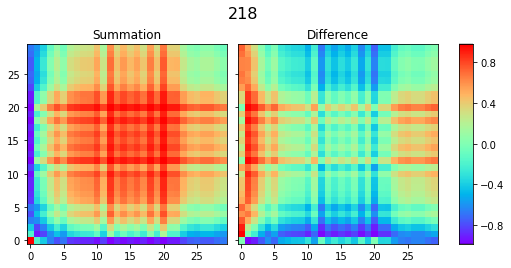

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


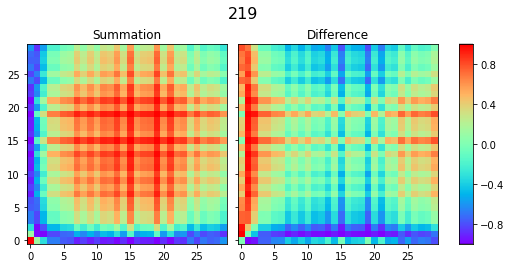

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


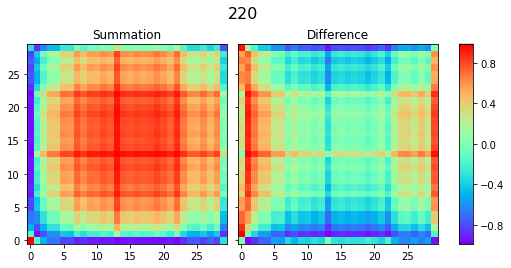

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


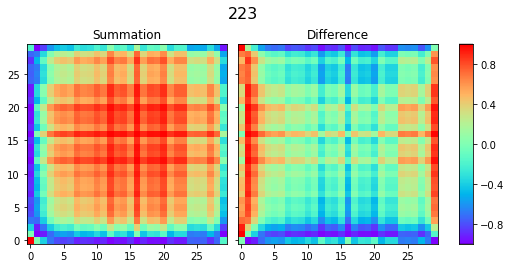

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


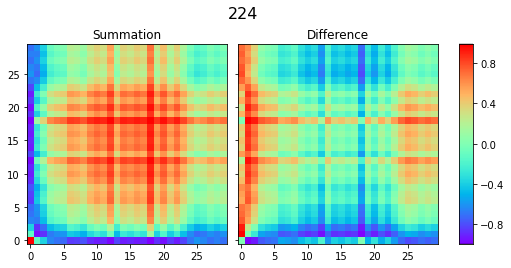

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


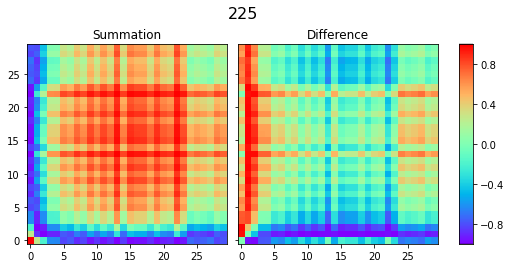

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


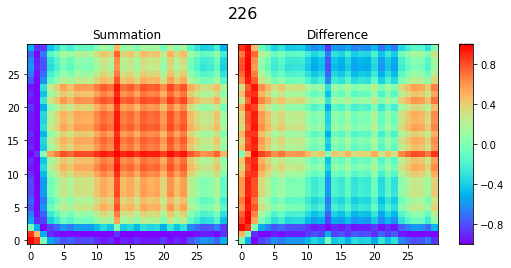

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


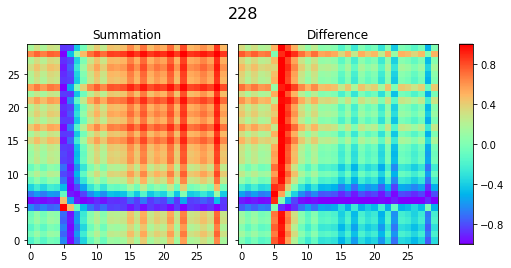

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


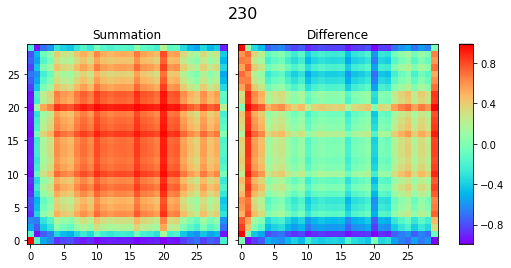

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


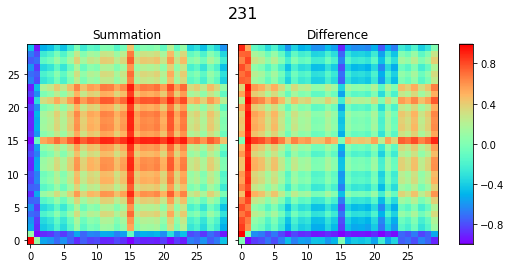

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


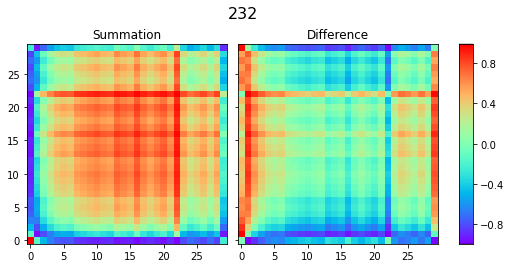

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


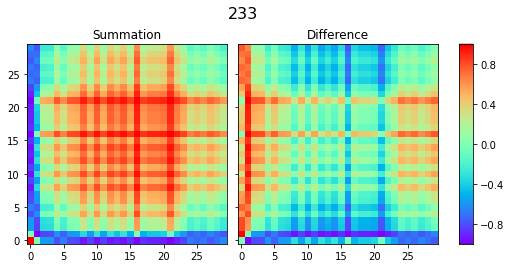

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


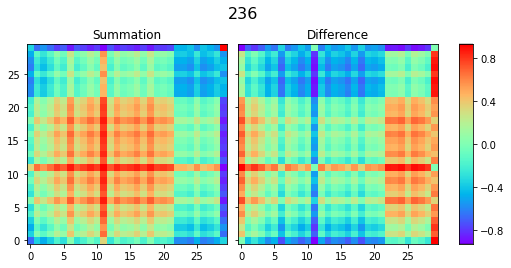

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


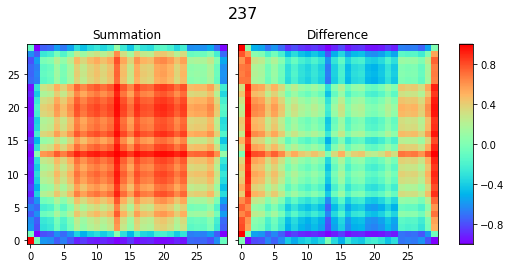

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


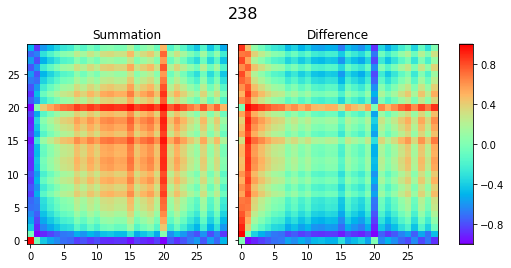

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


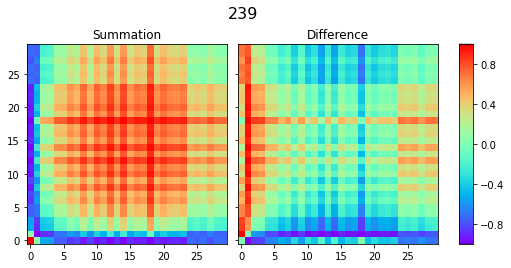

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


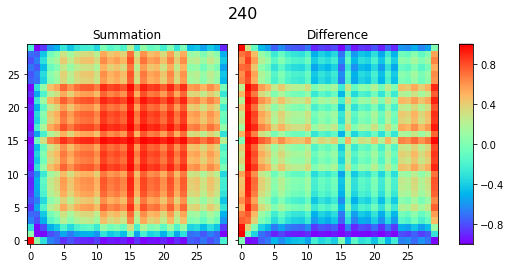

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


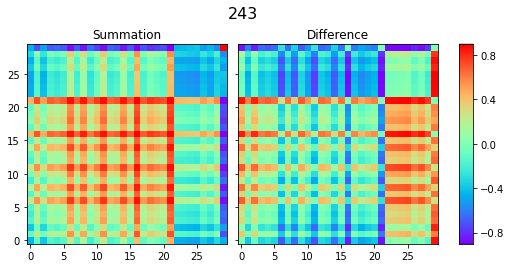

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


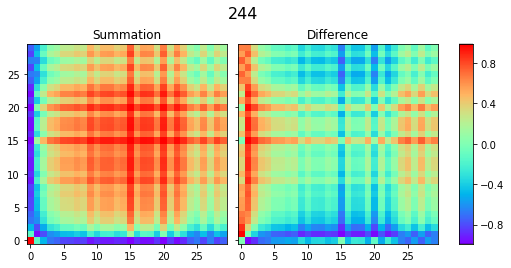

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


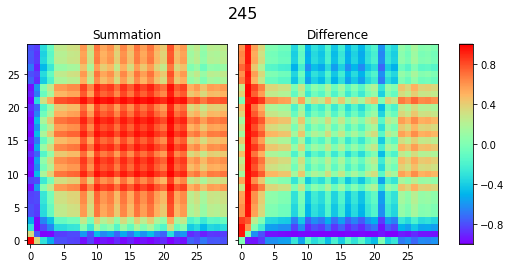

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


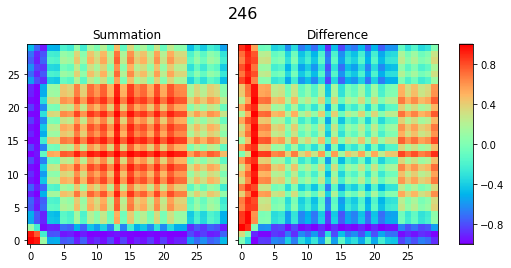

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


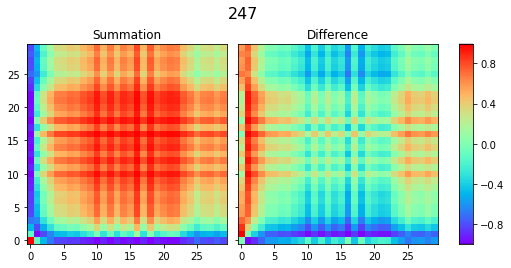

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


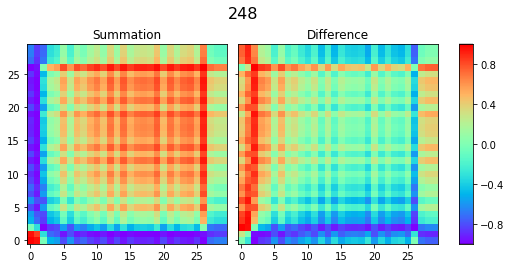

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


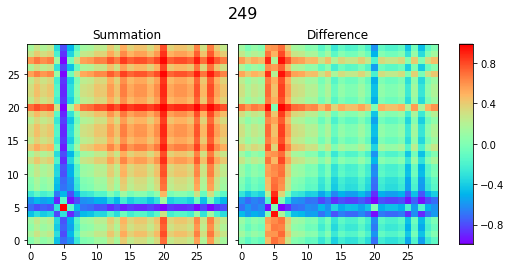

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


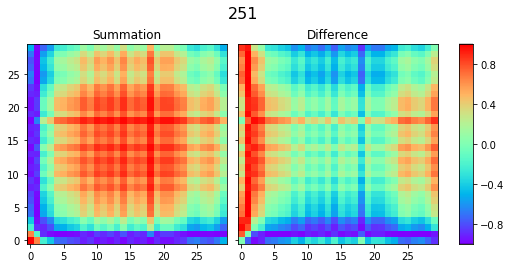

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


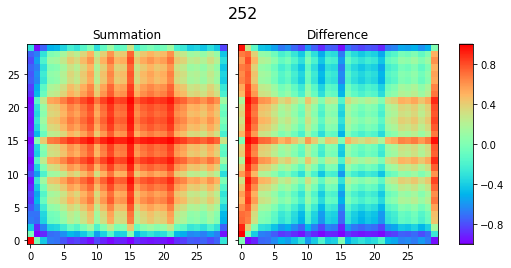

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


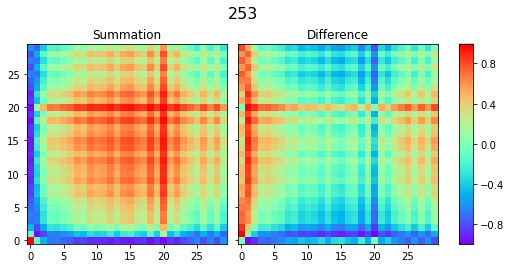

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


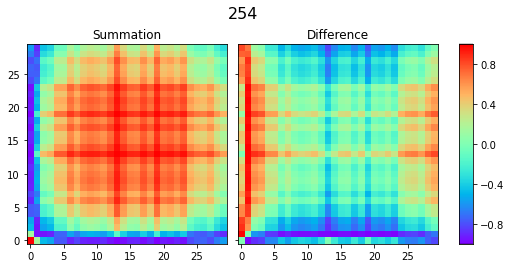

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


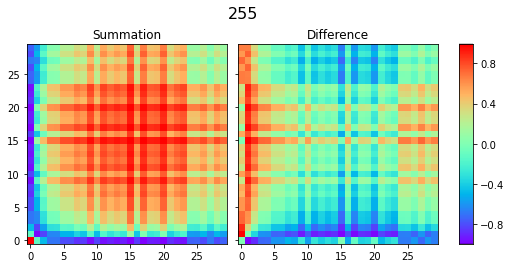

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


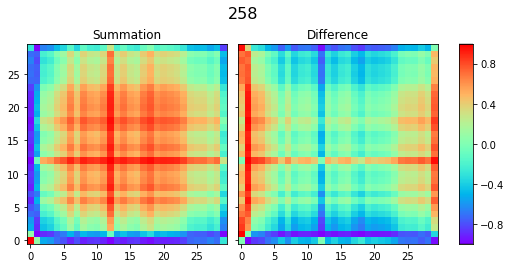

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


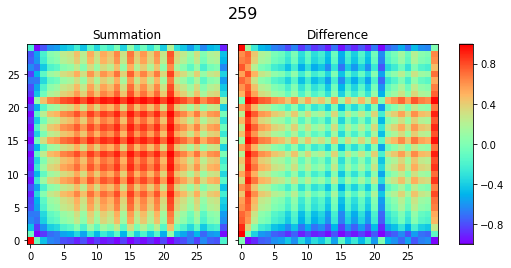

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


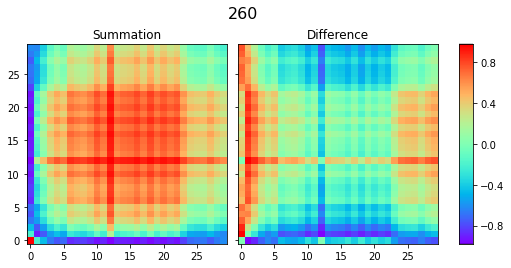

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


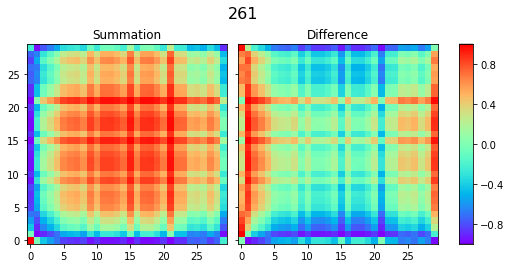

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


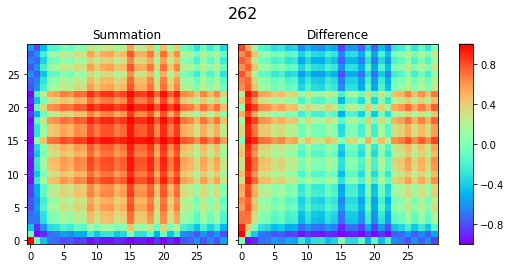

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


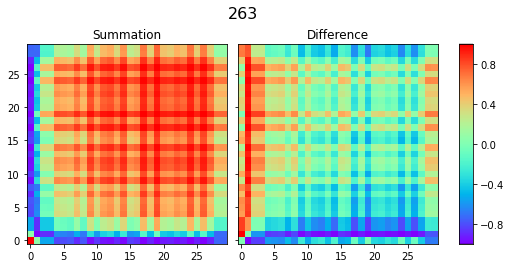

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


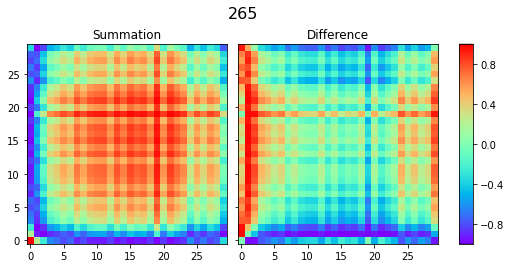

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


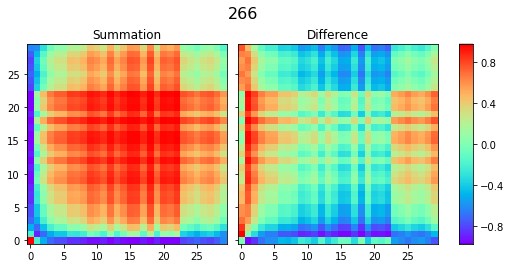

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


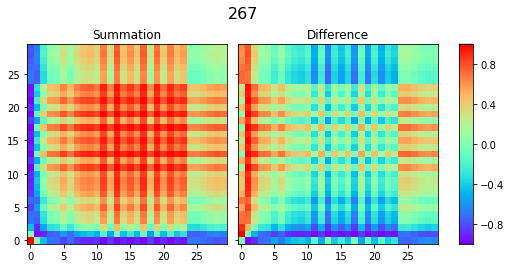

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


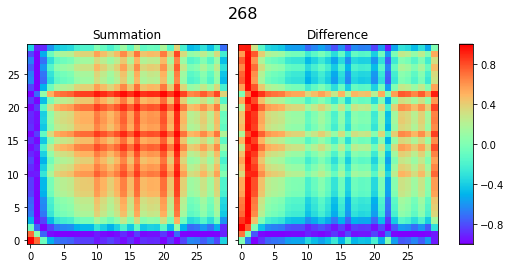

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


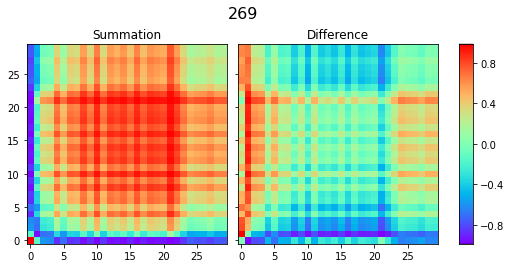

C:\Users\user\anaconda3\envs\makedata\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


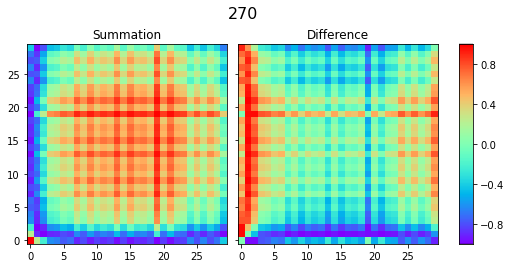

In [7]:
cnt_=1
#for c in range(math.ceil(len(Cut_data_main)/4455)-1):
for c in range(math.ceil(len(Cut_data_main)/30)-1):
    #data_imaging = pd.read_csv("peak_con/rdx/200n/csv/RDX_200ng_%d.csv"% (cnt_))
    data_imaging = pd.read_csv("sci/농도별데이터_2022/NG/200ng/200_10/NG_200ng_10_%d.csv"% (cnt_))
    #data_imaging = pd.read_csv("sci/농도별데이터_2022/Normal/10_10/Normal_10_%d.csv"% (cnt_))
    data_imaging_gg = data_imaging[['0']]
    data_imaging_gg = np.array(data_imaging_gg)
    #print(data_imaging_gg)
    
    nsample, nx = data_imaging_gg.shape
    data_imaging_gg_new = data_imaging_gg.reshape((1,nsample))
    
    #if nsample >= 100:
    if nsample >= 30:
        gasf = GramianAngularField(image_size=30, method='summation')
        X_gasf = gasf.fit_transform(data_imaging_gg_new)
        gadf = GramianAngularField(image_size=30, method='difference')
        X_gadf = gadf.fit_transform(data_imaging_gg_new)

        fig = plt.figure(figsize=(8,4))
        grid = ImageGrid(fig, 111,
                        nrows_ncols=(1,2),
                        axes_pad=0.15,
                        share_all=True,
                        cbar_location="right",
                        cbar_mode="single",
                        cbar_size="7%",
                        cbar_pad=0.3,
                        )
        images = [X_gasf[0], X_gadf[0]]
        titles = ['Summation', 'Difference']
        for image, title, ax in zip(images, titles, grid):
            im = ax.imshow(image, cmap='rainbow', origin='lower')
            ax.set_title(title, fontdict={'fontsize': 12})
        ax.cax.colorbar(im)
        ax.cax.toggle_label(True)
        plt.suptitle(cnt_, y=0.98, fontsize=16)
        #plt.savefig('peak_con/rdx/200n/img/RDX_200ng_%d.png'% (cnt_))
        plt.savefig('sci/농도별데이터_2022/NG/200ng/200_10/NG_200ng_10_%d.png'% (cnt_))
        #plt.savefig('sci/농도별데이터_2022/Normal/10_10/Normal_10_%d.png'% (cnt_))
        plt.show()
        fig.clear()
    cnt_=cnt_+1

In [8]:
#data_frame_preview = pd.read_csv("RDX_10ng.csv")

In [9]:
'''
for c in range(math.ceil(len(Cut_data_main)/90)-1):
    fff = data_frame_preview[i*90:(i+1)*90]
    fff.plot()
'''

'\nfor c in range(math.ceil(len(Cut_data_main)/90)-1):\n    fff = data_frame_preview[i*90:(i+1)*90]\n    fff.plot()\n'

In [10]:
'''
tnt_10ng = pd.read_json('농도별데이터_json/농도별데이터_json/TNT_test_10ng.json')
tnt_50ng = pd.read_json('농도별데이터_json/농도별데이터_json/TNT_test_50ng.json')
tnt_150ng = pd.read_json('농도별데이터_json/농도별데이터_json/TNT_test_150ng.json')
tnt_200ng = pd.read_json('농도별데이터_json/농도별데이터_json/TNT_test_200ng.json')

petn_10ng = pd.read_json('농도별데이터_json/농도별데이터_json/PETN_test_10ng.json')
petn_50ng = pd.read_json('농도별데이터_json/농도별데이터_json/PETN_test_50ng.json')
petn_150ng = pd.read_json('농도별데이터_json/농도별데이터_json/PETN_test_150ng.json')
petn_200ng = pd.read_json('농도별데이터_json/농도별데이터_json/PETN_test_200ng.json')

rdx_10ng = pd.read_json('농도별데이터_json/농도별데이터_json/RDX_test_10ng.json')
rdx_50ng = pd.read_json('농도별데이터_json/농도별데이터_json/RDX_test_50ng.json')
rdx_150ng = pd.read_json('농도별데이터_json/농도별데이터_json/RDX_test_150ng.json')
rdx_200ng = pd.read_json('농도별데이터_json/농도별데이터_json/RDX_test_200ng.json')
'''

"\ntnt_10ng = pd.read_json('농도별데이터_json/농도별데이터_json/TNT_test_10ng.json')\ntnt_50ng = pd.read_json('농도별데이터_json/농도별데이터_json/TNT_test_50ng.json')\ntnt_150ng = pd.read_json('농도별데이터_json/농도별데이터_json/TNT_test_150ng.json')\ntnt_200ng = pd.read_json('농도별데이터_json/농도별데이터_json/TNT_test_200ng.json')\n\npetn_10ng = pd.read_json('농도별데이터_json/농도별데이터_json/PETN_test_10ng.json')\npetn_50ng = pd.read_json('농도별데이터_json/농도별데이터_json/PETN_test_50ng.json')\npetn_150ng = pd.read_json('농도별데이터_json/농도별데이터_json/PETN_test_150ng.json')\npetn_200ng = pd.read_json('농도별데이터_json/농도별데이터_json/PETN_test_200ng.json')\n\nrdx_10ng = pd.read_json('농도별데이터_json/농도별데이터_json/RDX_test_10ng.json')\nrdx_50ng = pd.read_json('농도별데이터_json/농도별데이터_json/RDX_test_50ng.json')\nrdx_150ng = pd.read_json('농도별데이터_json/농도별데이터_json/RDX_test_150ng.json')\nrdx_200ng = pd.read_json('농도별데이터_json/농도별데이터_json/RDX_test_200ng.json')\n"

In [11]:
'''
print("TNT_10ng :",len(tnt_10ng),"\n")
print("TNT_50ng :",len(tnt_50ng),"\n")
print("TNT_150ng :",len(tnt_150ng),"\n")
print("TNT_200ng :",len(tnt_200ng),"\n")

print("PETN_10ng :",len(petn_10ng),"\n")
print("PETN_50ng :",len(petn_50ng),"\n")
print("PETN_150ng :",len(petn_150ng),"\n")
print("PETN_200ng :",len(petn_200ng),"\n")

print("RDX_10ng :",len(rdx_10ng),"\n")
print("RDX_50ng :",len(rdx_50ng),"\n")
print("RDX_150ng :",len(rdx_150ng),"\n")
print("RDX_200ng :",len(rdx_200ng),"\n")
'''

'\nprint("TNT_10ng :",len(tnt_10ng),"\n")\nprint("TNT_50ng :",len(tnt_50ng),"\n")\nprint("TNT_150ng :",len(tnt_150ng),"\n")\nprint("TNT_200ng :",len(tnt_200ng),"\n")\n\nprint("PETN_10ng :",len(petn_10ng),"\n")\nprint("PETN_50ng :",len(petn_50ng),"\n")\nprint("PETN_150ng :",len(petn_150ng),"\n")\nprint("PETN_200ng :",len(petn_200ng),"\n")\n\nprint("RDX_10ng :",len(rdx_10ng),"\n")\nprint("RDX_50ng :",len(rdx_50ng),"\n")\nprint("RDX_150ng :",len(rdx_150ng),"\n")\nprint("RDX_200ng :",len(rdx_200ng),"\n")\n'